<a href="https://colab.research.google.com/github/diptoromeo/BERT-and-ELMo-with-CNN-BiLSTM-and-CNN_BiLSTM/blob/main/ELMo%2BBERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install allennlp
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 730.2/730.2 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.2/248.2 kB 28.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 76.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 109.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 30.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [2]:
import random
import keras.models
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation
import os
import pandas as pd
import regex
import numpy as np
from sklearn.model_selection import train_test_split
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Lambda, Input, TimeDistributed, LSTM, Bidirectional
from keras.layers import Conv1D, Flatten, Dropout, GlobalMaxPool1D, MaxPooling1D
#from tensorflow.keras.layers import Conv1D, Flatten, Dropout, GlobalMaxPool1D, MaxPooling1D, Dense
import tensorflow_hub as hub
from tensorflow.keras import layers, models, Sequential
import tensorflow.compat.v1 as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.python.client import device_lib
import timeit
tf.compat.v1.experimental.output_all_intermediates(True) #Graph execution for BiLSTM Models
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dense, Embedding, Dropout
print(tf.__version__)
print(device_lib.list_local_devices())



2.15.0
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10308248218767182494
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14626652160
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8592768204419029523
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [3]:
import random
import time
import datetime
import gc
from random import seed
import nltk
import os
import pandas as pd
import regex
import numpy as np
from keras.utils import pad_sequences
from numpy.f2py.crackfortran import quiet
from opt_einsum.backends import torch
from pandas.core.common import flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
# ================================================================================================
from transformers import BertModel,BertForSequenceClassification, AdamW, BertConfig,BertTokenizer,get_linear_schedule_with_warmup
import torch
import torch.nn as nn
# !pip install pytorch_lightning
# !pip install torchaudio --upgrade
# import pytorch_lightning as pl
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler,random_split
from sklearn.metrics import roc_auc_score,f1_score, roc_curve

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#Heading 1
Preprocessing the Dataset

In [4]:
##===============================Nltk abstract_words tokenize======================================
with open('/content/FGFSJournal.txt', 'rt', encoding='UTF8') as file:
    FGCS_abstract = []
    for line in file:
        if '<abstract>' in line:
            abstract = line.split('</abstract>')[0].split('<abstract>')[-1]
            abstract = ''.join(i for i in abstract if not i.isdigit())
            abstract = regex.sub('[^\w\d\s]+', '', abstract)
            ##abstract = nltk.sent_tokenize(abstract)
            abstract = nltk.word_tokenize(abstract)
            stop_words = set(stopwords.words('english'))
            filtered_sentence_abstract = [w.lower() for w in abstract if
                                          w.lower() not in punctuation and w.lower() not in stop_words]
            tagged_list = nltk.pos_tag(filtered_sentence_abstract)
            nouns_list = [t[0] for t in tagged_list if t[-1] == 'NN']
            lm = WordNetLemmatizer()
            singluar_form = [lm.lemmatize(w, pos='v') for w in nouns_list]
            FGCS_abstract.append(singluar_form)

print(len(FGCS_abstract))
print(FGCS_abstract[0])

5659
['architecture', 'inference']


#Heading 2
Spling the preprocessing dataset to Train and Test data.

In [5]:
random.shuffle(FGCS_abstract)
train_data = FGCS_abstract[:4527]
test_data = FGCS_abstract[4527:]
print("train data:", len(train_data))
print("test data:", len(test_data))

train, valid = train_test_split(train_data, test_size=0.25, random_state=42)
print("train:", len(train))
print("valid:", len(valid))

train data: 4527
test data: 1132
train: 3395
valid: 1132


#Data Labeling
Making Data Labeling about Top-10, 20, 30 words

In [6]:
#======================================================train_labels==========================================================================
ten_words = ['paper', 'system', 'performance', 'network', 'model', 'service', 'time', 'information', 'approach', 'cloud']
twenty_words = ['paper', 'system', 'performance', 'network', 'model', 'service', 'time', 'information', 'approach', 'cloud',
                'problem', 'process', 'security', 'analysis', 'application', 'method', 'research', 'framework', 'number', 'resource']
thirty_words = ['paper', 'system', 'performance', 'network', 'model', 'service', 'time', 'information', 'approach', 'cloud',
                'problem', 'process', 'security', 'analysis', 'application', 'method', 'research', 'framework', 'number', 'resource',
               'environment', 'algorithm', 'energy', 'management', 'architecture', 'access', 'scheme', 'communication', 'execution', 'order']



##==============================10-words label==================================
train10_labels = []

for doc in train:
    label = []
    for term in ten_words:
        if term in doc:
            label.append(1)
        else:
            label.append(0)
    train10_labels.append(label)

print("10_train labels:", len(train10_labels))

##==================valid_labels==================
valid10_labels = []
for doc in valid:
    label = []
    for term in ten_words:
        if term in doc:
            label.append(1)
        else:
            label.append(0)
    valid10_labels.append(label)

print("10_valid labels:", len(valid10_labels))

##==================Test_labels==================
test10_labels = []
for doc in test_data:
    label = []
    for term in ten_words:
        if term in doc:
            label.append(1)
        else:
            label.append(0)
    test10_labels.append(label)

print("10_test labels:", len(test10_labels))


##==============================20-words label==================================
train20_labels = []
for doc in train:
    label = []
    for term in twenty_words:
        if term in doc:
            label.append(1)
        else:
            label.append(0)
    train20_labels.append(label)

print("20_train labels:", len(train20_labels))


##==================valid_labels==================
valid20_labels = []
for doc in valid:
    label = []
    for term in twenty_words:
        if term in doc:
            label.append(1)
        else:
            label.append(0)
    valid20_labels.append(label)

print("20_valid labels:", len(valid20_labels))


##==================Test_labels==================
test20_labels = []
for doc in test_data:
    label = []
    for term in twenty_words:
        if term in doc:
            label.append(1)
        else:
            label.append(0)
    test20_labels.append(label)

print("20_test labels:", len(test20_labels))


##==============================30-words label==================================
train30_labels = []
for doc in train:
    label = []
    for term in thirty_words:
        if term in doc:
            label.append(1)
        else:
            label.append(0)
    train30_labels.append(label)

print("30_train labels:", len(train30_labels))


##==================valid_labels==================
valid30_labels = []
for doc in valid:
    label = []
    for term in thirty_words:
        if term in doc:
            label.append(1)
        else:
            label.append(0)
    valid30_labels.append(label)

print("30_valid labels:", len(valid30_labels))


##==================Test_labels==================
test30_labels = []
for doc in test_data:
    label = []
    for term in thirty_words:
        if term in doc:
            label.append(1)
        else:
            label.append(0)
    test30_labels.append(label)

print("30_test labels:", len(test30_labels))


10_train labels: 3395
10_valid labels: 1132
10_test labels: 1132
20_train labels: 3395
20_valid labels: 1132
20_test labels: 1132
30_train labels: 3395
30_valid labels: 1132
30_test labels: 1132


#ELMo Embeddings

In [7]:
elmo = hub.load("https://tfhub.dev/google/elmo/3")

#Data Representatiom

In [8]:

# Tokenize and pad sequences
max_words = 100001
max_sequence_length = 156
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data)
sequences = tokenizer.texts_to_sequences(train_data)
X = pad_sequences(sequences, maxlen=max_sequence_length)

tokenizer.fit_on_texts(test_data)
test = tokenizer.texts_to_sequences(test_data)
X_test = pad_sequences(test, maxlen=max_sequence_length)

y10_train = np.array(train10_labels)
y20_train = np.array(train20_labels)
y30_train = np.array(train30_labels)
y10_valid = np.array(valid10_labels)
y20_valid = np.array(valid20_labels)
y30_valid = np.array(valid30_labels)
y10_test = np.array(test10_labels)
y20_test = np.array(test20_labels)
y30_test = np.array(test30_labels)

y10_test = np.argmax(y10_test, axis=1)
y20_test = np.argmax(y20_test, axis=1)
y30_test = np.argmax(y30_test, axis=1)


# Split the dataset into training and testing sets
X_train, X_valid = train_test_split(X,  test_size=0.25, random_state=42)

vocab_size = min(max_words, len(tokenizer.word_index) + 1)
embedding_dim = 1024  # ELMo embeddings have a dimension of 1024

# Add an Embedding layer to the model
vocab_size = min(max_words, len(tokenizer.word_index) + 1)
embedding_dim = 1024  # This should match the ELMo embedding dimension

#Models Hyperparameters

In [9]:
epochs = 20
batch_sizes = 16
bilstm_embedding_dim = 256
filter_sizes = 128
kernel_sizes = 5
hidden_layers = 64
lstm_memory = 64
bilstm_memory = 50
dropout = 0.5
ten_num_classes = 10
twenty_num_classes = 20
thirty_num_classes = 30

#ELMo + CNN Model

#ELMo Embedding
Making ELMo Embedding to get ELMo from TensoFlow

In [12]:
tf.disable_eager_execution()

In [13]:
def ten_word_cnn_model():
  cnn_model = Sequential()
  cnn_model.add(Embedding(input_dim=vocab_size, output_dim=bilstm_embedding_dim, input_length=max_sequence_length))
  cnn_model.add(Conv1D(filters=filter_sizes, kernel_size=kernel_sizes, activation='relu'))
  cnn_model.add(GlobalMaxPooling1D())
  cnn_model.add(Dense(hidden_layers, activation='relu'))
  cnn_model.add(Dropout(dropout))
  cnn_model.add(Dense(ten_num_classes, activation='softmax'))
  cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  cnn_model.summary()
  return cnn_model


def twenty_word_cnn_model():
  cnn_model = Sequential()
  cnn_model.add(Embedding(input_dim=vocab_size, output_dim=bilstm_embedding_dim, input_length=max_sequence_length))
  cnn_model.add(Conv1D(filters=filter_sizes, kernel_size=kernel_sizes, activation='relu'))
  cnn_model.add(GlobalMaxPooling1D())
  cnn_model.add(Dense(hidden_layers, activation='relu'))
  cnn_model.add(Dropout(dropout))
  cnn_model.add(Dense(twenty_num_classes, activation='softmax'))
  cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  cnn_model.summary()
  return cnn_model


def thirty_word_cnn_model():
  cnn_model = Sequential()
  cnn_model.add(Embedding(input_dim=vocab_size, output_dim=bilstm_embedding_dim, input_length=max_sequence_length))
  cnn_model.add(Conv1D(filters=filter_sizes, kernel_size=kernel_sizes, activation='relu'))
  cnn_model.add(GlobalMaxPooling1D())
  cnn_model.add(Dense(hidden_layers, activation='relu'))
  cnn_model.add(Dropout(dropout))
  cnn_model.add(Dense(thirty_num_classes, activation='softmax'))
  cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  cnn_model.summary()
  return cnn_model


cnn_model1 = ten_word_cnn_model()
cnn_model2 = twenty_word_cnn_model()
cnn_model3 = thirty_word_cnn_model()

cnn_model1.save("ten_word_cnn_model")
cnn_model1.save("twenty_word_cnn_model")
cnn_model1.save("thirty_word_cnn_model")


##=================10words model training=====================================
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    history10 = cnn_model1.fit(X_train, y10_train, epochs=epochs, batch_size=batch_sizes, steps_per_epoch=8)

    ELMo10_CNN_Accuracy = cnn_model1.evaluate(X_train, y10_train, verbose=1)
    print(('ELMo10_CNN_Accuracy: %f' % (ELMo10_CNN_Accuracy[1] * 100)))


##===============================ELMo10_CNN_Model Evaluation========================================
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    # Here X_test, y_test are the test data points
    predictions = cnn_model1.predict(X_test)
    predictions = predictions[:, 0]

    # CBOW Tst Accuracy
    ELMo10_CNN_Test_Accuracy = accuracy_score(y10_test, np.round(abs(predictions)))
    print('ELMo10_CNN_Test_Accuracy: %f' % ELMo10_CNN_Test_Accuracy)

    # Calculating the precision score of classifier
    ELMo10_CNN_Precision = precision_score(y10_test, np.round(abs(predictions)), average='micro')
    print('ELMo10_CNN_Precision: %f' % ELMo10_CNN_Precision)

    # Calculating the recall score of classifier
    ELMo10_CNN_Recall = recall_score(y10_test, np.round(abs(predictions)), average='micro')
    print('ELMo10_CNN_Recall: %f' % ELMo10_CNN_Recall)

    # Calculating the F1 score of classifier
    ELMo10_CNN_F1_Score = f1_score(y10_test, np.round(abs(predictions)), average='micro')
    print('ELMo10_CNN_F1_Score: %f' % ELMo10_CNN_F1_Score)


# cnn_data10 = {
#     'Name': ["ELMo10_CNN_Accuracy", "ELMo10CNN_Test_Accuracy", "ELMo10_CNN_Precision", "ELMo10_CNN_Recall", "ELMo10_CNN_F1_Score"],
#     'Scores': [ELMo10_CNN_Accuracy, ELMo10_CNN_Test_Accuracy, ELMo10_CNN_Precision, ELMo10_CNN_Recall, ELMo10_CNN_F1_Score] #
# }
# df = pd.DataFrame(cnn_data10)
# df.to_excel('ELMo10_CNN_Scores_file.xlsx', index=False)


##=================20words model training=====================================
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    history20 = cnn_model2.fit(X_train, y20_train, epochs=epochs, batch_size=batch_sizes, steps_per_epoch=8)

    ELMo20_CNN_Accuracy = cnn_model2.evaluate(X_train, y20_train, verbose=1)
    print(('ELMo20_CNN_Accuracy: %f' % (ELMo20_CNN_Accuracy[1] * 100)))

##===============================ELMo20_CNN_Model Evaluation========================================
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    # Here X_test, y_test are the test data points
    predictions = cnn_model2.predict(X_test)
    predictions = predictions[:, 0]

    # CBOW Tst Accuracy
    ELMo20_CNN_Test_Accuracy = accuracy_score(y20_test, np.round(abs(predictions)))
    print('ELMo20_CNN_Test_Accuracy y: %f' % ELMo20_CNN_Test_Accuracy )

    # Calculating the precision score of classifier
    ELMo20_CNN_Precision = precision_score(y20_test, np.round(abs(predictions)), average='micro')
    print('ELMo20_CNN_Precision: %f' % ELMo20_CNN_Precision)

    # Calculating the recall score of classifier
    ELMo20_CNN_Recall = recall_score(y20_test, np.round(abs(predictions)), average='micro')
    print('ELMo20_CNN_Recall: %f' % ELMo20_CNN_Recall)

    # Calculating the F1 score of classifier
    ELMo20_CNN_F1_Score = f1_score(y20_test, np.round(abs(predictions)), average='micro')
    print('ELMo20_CNN_F1_Score: %f' % ELMo20_CNN_F1_Score)


# cnn_data20 = {
#     'Name': ["ELMo20_CNN_Accuracy", "ELMo20_CNN_Test_Accuracy ", "ELMo20CNN_Precision", "ELMo20_CNN_Recall", "ELMo20_CNN_F1_Score"],
#     'Scores': [ELMo20_CNN_Accuracy, ELMo20_CNN_Test_Accuracy , ELMo20_CNN_Precision, ELMo20_CNN_Recall, ELMo20_CNN_F1_Score]
# }
# df = pd.DataFrame(cnn_data20)
# df.to_excel('ELMo20_CNN_Scores_file.xlsx', index=False)


##=================30words model training=====================================
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    history30 = cnn_model3.fit(X_train, y30_train, epochs=epochs, batch_size=batch_sizes, steps_per_epoch=8)

    ELMo30_CNN_Accuracy = cnn_model1.evaluate(X_train, y10_train, verbose=1)
    print(('ELMo30_CNN_Accuracy: %f' % (ELMo30_CNN_Accuracy[1] * 100)))

##===============================ELMo30_CNN_Model Evaluation========================================
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    # Here X_test, y_test are the test data points
    predictions = cnn_model3.predict(X_test)
    predictions = predictions[:, 0]

    # CBOW Tst Accuracy
    ELMo30_CNN_Test_Accuracy = accuracy_score(y30_test, np.round(abs(predictions)))
    print('ELMo30_CNN_Test_Accuracy: %f' % ELMo30_CNN_Test_Accuracy)

    # Calculating the precision score of classifier
    ELMo30_CNN_Precision = precision_score(y30_test, np.round(abs(predictions)), average='micro')
    print('ELMo30_CNN_Precision: %f' % ELMo30_CNN_Precision)

    # Calculating the recall score of classifier
    ELMo30_CNN_Recall = recall_score(y30_test, np.round(abs(predictions)), average='micro')
    print('ELMo30_CNN_Recall: %f' % ELMo30_CNN_Recall)

    # Calculating the F1 score of classifier
    ELMo30_CNN_F1_Score = f1_score(y30_test, np.round(abs(predictions)), average='micro')
    print('ELMo30_CNN_F1_Score: %f' % ELMo30_CNN_F1_Score)


# cnn_data30 = {
#     'Name': ["ELMo30_CNN_F1_Score", "ELMo30_CNN_Test_Accuracy", "ELMo30_CNN_Precision", "ELMo30_CNN_Recall", "ELMo30_CNN_F1_Score"],
#     'Scores': [ELMo30_CNN_F1_Score, ELMo30_CNN_Test_Accuracy, ELMo30_CNN_Precision, ELMo30_CNN_Recall, ELMo30_CNN_F1_Score]
# }
# df = pd.DataFrame(cnn_data30)
# df.to_excel('ELMo30_CNN_Scores_file.xlsx', index=False)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 156, 256)          3320320   
                                                                 
 conv1d_6 (Conv1D)           (None, 152, 128)          163968    
                                                                 
 global_max_pooling1d_6 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 10)                650       
                                                      

Train on 8 samples
Epoch 1/20
8/8 [==============================] - 9s 334ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.6555 - accuracy: 0.7076
Epoch 2/20
8/8 [==============================] - 3s 333ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.5965 - accuracy: 0.7104
Epoch 3/20
8/8 [==============================] - 3s 336ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.5624 - accuracy: 0.7169
Epoch 4/20
8/8 [==============================] - 3s 339ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.5137 - accuracy: 0.7197
Epoch 5/20
8/8 [==============================] - 3s 336ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.4482 - accuracy: 0.7339
Epoch 6/20
8/8 [==============================] - 3s 332ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.3725 - accuracy: 0.7508
Epoch 7/20
8/8 [==============================] - 3s 331ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.2997 - accuracy: 0.7681
Epoch 8/20
8/8 [==============================] - 3s 335ms/step - batch: 3.500

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


ELMo10_CNN_Accuracy: 79.222369


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


ELMo10_CNN_Test_Accuracy: 0.689929
ELMo10_CNN_Precision: 0.689929
ELMo10_CNN_Recall: 0.689929
ELMo10_CNN_F1_Score: 0.689929


Train on 8 samples
Epoch 1/20
8/8 [==============================] - 3s 189ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.6712 - accuracy: 0.7677
Epoch 2/20
8/8 [==============================] - 2s 188ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.6146 - accuracy: 0.7677
Epoch 3/20
8/8 [==============================] - 1s 187ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.5678 - accuracy: 0.7677
Epoch 4/20
8/8 [==============================] - 2s 190ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.5281 - accuracy: 0.7678
Epoch 5/20
8/8 [==============================] - 2s 188ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.4890 - accuracy: 0.7681
Epoch 6/20
8/8 [==============================] - 2s 189ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.4469 - accuracy: 0.7694
Epoch 7/20
8/8 [==============================] - 2s 189ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.4029 - accuracy: 0.7724
Epoch 8/20
8/8 [==============================] - 2s 189ms/step - batch: 3.500

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


ELMo20_CNN_Accuracy: 79.194415


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


ELMo20_CNN_Test_Accuracy y: 0.664311
ELMo20_CNN_Precision: 0.664311
ELMo20_CNN_Recall: 0.664311
ELMo20_CNN_F1_Score: 0.664311


Train on 8 samples
Epoch 1/20
8/8 [==============================] - 3s 191ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.6636 - accuracy: 0.8033
Epoch 2/20
8/8 [==============================] - 2s 193ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.5925 - accuracy: 0.8033
Epoch 3/20
8/8 [==============================] - 2s 191ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.5467 - accuracy: 0.8034
Epoch 4/20
8/8 [==============================] - 2s 190ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.5155 - accuracy: 0.8035
Epoch 5/20
8/8 [==============================] - 2s 190ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.4907 - accuracy: 0.8035
Epoch 6/20
8/8 [==============================] - 2s 187ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.4668 - accuracy: 0.8035
Epoch 7/20
8/8 [==============================] - 2s 192ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.4390 - accuracy: 0.8037
Epoch 8/20
8/8 [==============================] - 2s 190ms/step - batch: 3.500

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


ELMo30_CNN_Test_Accuracy: 0.659894
ELMo30_CNN_Precision: 0.659894
ELMo30_CNN_Recall: 0.659894
ELMo30_CNN_F1_Score: 0.659894


#ELMo + BiLSTM Models

In [14]:
%env TF_ALLOCATOR_MAX_ALLOCATION_SIZE=10G

env: TF_ALLOCATOR_MAX_ALLOCATION_SIZE=10G


In [15]:
#tf.disable_eager_execution

In [16]:
from optparse import Option
# Tuning and Define the BiLSTM models
batch_sizes = 16

def ten_word_bilstm_model():
  bilstm_model = Sequential()
  bilstm_model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_sequence_length))
  bilstm_model.add(Bidirectional(LSTM(bilstm_memory, return_sequences = False)))
  bilstm_model.add(Dropout(dropout))
  bilstm_model.add(Dense(ten_num_classes, activation='softmax'))
  bilstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  bilstm_model.summary()
  return bilstm_model

def twenty_word_bilstm_model():
  bilstm_model = Sequential()
  bilstm_model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_sequence_length))
  bilstm_model.add(Bidirectional(LSTM(bilstm_memory, return_sequences = False)))
  bilstm_model.add(Dropout(dropout))
  bilstm_model.add(Dense(twenty_num_classes, activation='softmax'))
  bilstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  bilstm_model.summary()
  return bilstm_model

def thirty_word_bilstm_model():
  bilstm_model = Sequential()
  bilstm_model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_sequence_length))
  bilstm_model.add(Bidirectional(LSTM(bilstm_memory, return_sequences = False)))
  bilstm_model.add(Dropout(dropout))
  bilstm_model.add(Dense(thirty_num_classes, activation='softmax'))
  # Compile the model
  bilstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  bilstm_model.summary()
  return bilstm_model


bilstm_model1 = ten_word_bilstm_model()
bilstm_model2 = twenty_word_bilstm_model()
bilstm_model3 = thirty_word_bilstm_model()

bilstm_model1.save("ten_word_bilstm_model")
bilstm_model1.save("twenty_word_bilstm_model")
bilstm_model1.save("thirty_word_bilstm_model")


##=================10words model training=====================================
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    history10 = bilstm_model1.fit(X_train, y10_train, epochs=epochs, batch_size=batch_sizes, steps_per_epoch=8)

    ELMo10_BiLSTM_Accuracy = bilstm_model1.evaluate(X_train, y10_train, verbose=1)
    print(('ELMo10_BiLSTM_Accuracy: %f' % (ELMo10_BiLSTM_Accuracy[1] * 100)))


##===============================ELMo10_CNN_Model Evaluation========================================
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    # Here X_test, y_test are the test data points
    predictions = bilstm_model1.predict(X_test)
    predictions = predictions[:, 0]

    # CBOW Tst Accuracy
    ELMo10_BiLSTM_Test_Accuracy = accuracy_score(y10_test, np.round(abs(predictions)))
    print('ELMo10_BiLSTM_Test_Accuracy: %f' % ELMo10_BiLSTM_Test_Accuracy)

    # Calculating the precision score of classifier
    ELMo10_BiLSTM_precision = precision_score(y10_test, np.round(abs(predictions)), average='micro')
    print('ELMo10_BiLSTM_precision: %f' % ELMo10_BiLSTM_precision)

    # Calculating the recall score of classifier
    ELMo10_BiLSTM_Recall = recall_score(y10_test, np.round(abs(predictions)), average='micro')
    print('ELMo10_BiLSTM_Recall: %f' % ELMo10_BiLSTM_Recall)

    # Calculating the F1 score of classifier
    ELMo10_BiLSTM_F1_Score = f1_score(y10_test, np.round(abs(predictions)), average='micro')
    print('ELMo10_BiLSTM_F1_Score: %f' % ELMo10_BiLSTM_F1_Score)


# bilstm_data10 = {
#     'Name': ["ELMo10_BiLSTM_Accuracy", "ELMo10_BiLSTM_Test_Accuracy", "ELMo10_BiLSTM_precision", "ELMo10_BiLSTM_Recall", "ELMo10_BiLSTM_F1_Score"],
#     'Scores': [ELMo10_BiLSTM_Accuracy, ELMo10_BiLSTM_Test_Accuracy, ELMo10_BiLSTM_precision, ELMo10_BiLSTM_Recall, ELMo10_BiLSTM_F1_Score]
# }
# df = pd.DataFrame(bilstm_data10)
# df.to_excel('ELMo10_BiLSTM_Scores_file.xlsx', index=False)


##=================20words model training=====================================
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    history20 = bilstm_model2.fit(X_train, y20_train, epochs=epochs, batch_size=batch_sizes, steps_per_epoch=8)

    ELMo20_BiLSTM_Accuracy = bilstm_model2.evaluate(X_train, y20_train, verbose=1)
    print(('ELMo20_BiLSTM_Accuracy: %f' % (ELMo20_BiLSTM_Accuracy[1] * 100)))


##===============================ELMo20_CNN_Model Evaluation========================================
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    # Here X_test, y_test are the test data points
    predictions = bilstm_model2.predict(X_test)
    predictions = predictions[:, 0]

    # CBOW Tst Accuracy
    ELMo20_BiLSTM_Test_Accuracy = accuracy_score(y20_test, np.round(abs(predictions)))
    print('ELMo20_BiLSTM_Test_Accuracy: %f' % ELMo20_BiLSTM_Test_Accuracy)

    # Calculating the precision score of classifier
    ELMo20_BiLSTM_precision = precision_score(y20_test, np.round(abs(predictions)), average='micro')
    print('ELMo20_BiLSTM_precision: %f' % ELMo20_BiLSTM_precision)

    # Calculating the recall score of classifier
    ELMo20_BiLSTM_Recall = recall_score(y20_test, np.round(abs(predictions)), average='micro')
    print('ELMo20_BiLSTM_Recall: %f' % ELMo20_BiLSTM_Recall)

    # Calculating the F1 score of classifier
    ELMo20_BiLSTM_F1_Score = f1_score(y20_test, np.round(abs(predictions)), average='micro')
    print('ELMo20_BiLSTM_F1_Score: %f' % ELMo20_BiLSTM_F1_Score)


# bilstm_data20 = {
#     'Name': ["ELMo20_BiLSTM_Accuracy", "ELMo20_BiLSTM_Test_Accuracy", "ELMo20_BiLSTM_precision", "ELMo20_BiLSTM_Recall", "ELMo20_BiLSTM_F1_Score"],
#     'Scores': [ELMo20_BiLSTM_Accuracy, ELMo20_BiLSTM_Test_Accuracy, ELMo20_BiLSTM_precision, ELMo20_BiLSTM_Recall, ELMo20_BiLSTM_F1_Score]
# }
# df = pd.DataFrame(bilstm_data20)
# df.to_excel('ELMo20_BiLSTM_Scores_file.xlsx', index=False)


##=================30words model training=====================================
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    history30 = bilstm_model3.fit(X_train, y30_train, epochs=epochs, batch_size=batch_sizes, steps_per_epoch=8)

    ELMo30_BiLSTM_Accuracy = bilstm_model3.evaluate(X_train, y30_train, verbose=1)
    print(('ELMo30_BiLSTM_Accuracy: %f' % (ELMo30_BiLSTM_Accuracy[1] * 100)))


##===============================ELMo30_CNN_Model Evaluation========================================
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    # Here X_test, y_test are the test data points
    predictions = bilstm_model3.predict(X_test)
    predictions = predictions[:, 0]

    # CBOW Tst Accuracy
    ELMo30_BiLSTM_Test_Accuracy = accuracy_score(y30_test, np.round(abs(predictions)))
    print('ELMo30_BiLSTM_Test_Accuracy: %f' % ELMo30_BiLSTM_Test_Accuracy)

    # Calculating the precision score of classifier
    ELMo30_BiLSTM_precision = precision_score(y30_test, np.round(abs(predictions)), average='micro')
    print('ELMo30_BiLSTM_precision: %f' % ELMo30_BiLSTM_precision)

    # Calculating the recall score of classifier
    ELMo30_BiLSTM_Recall = recall_score(y30_test, np.round(abs(predictions)), average='micro')
    print('ELMo30_BiLSTM_Recall: %f' % ELMo30_BiLSTM_Recall)

    # Calculating the F1 score of classifier
    ELMo30_BiLSTM_F1_Score = f1_score(y30_test, np.round(abs(predictions)), average='micro')
    print('ELMo30_BiLSTM_F1_Score: %f' % ELMo30_BiLSTM_F1_Score)


# bilstm_data30 = {
#     'Name': ["ELMo30_BiLSTM_Accuracy", "ELMo30_BiLSTM_Test_Accuracy", "ELMo30_BiLSTM_precision", "ELMo30_BiLSTM_Recall", "ELMo30_BiLSTM_F1_Score"],
#     'Scores': [ELMo30_BiLSTM_Accuracy, ELMo30_BiLSTM_Test_Accuracy, ELMo30_BiLSTM_precision, ELMo30_BiLSTM_Recall, ELMo30_BiLSTM_F1_Score]
# }
# df = pd.DataFrame(bilstm_data30)
# df.to_excel('ELMo30_BiLSTM_Scores_file.xlsx', index=False)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 156, 128)          1660160   
                                                                 
 bidirectional (Bidirection  (None, 100)               71600     
 al)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 100)               0         
                                                                 
 dense_18 (Dense)            (None, 10)                1010      
                                                                 
Total params: 1732770 (6.61 MB)
Trainable params: 1732770 (6.61 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 156, 128)          1660160   
                                                                 
 bidirectional_1 (Bidirecti  (None, 100)               71600     
 onal)                                                           
                                                                 
 dropout_10 (Dropout)        (None, 100)               0         
                                                                 
 dense_19 (Dense)            (None, 20)                2020      
                                                                 
Total params: 1733780 (6.61 MB)
Trainable params: 1733780 (6.61 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 156, 128)          1660160   
                                                                 
 bidirectional_2 (Bidirecti  (None, 100)               71600     
 onal)                                                           
                                                                 
 dropout_11 (Dropout)        (None, 100)               0         
                                                                 
 dense_20 (Dense)            (None, 30)                3030      
                                                                 
Total params: 1734790 (6.62 MB)
Trainable params: 1734790 (6.62 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train on 8 samples
Epoch 1/20
8/8 [==============================] - 5s 348ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.6761 - accuracy: 0.7076
Epoch 2/20
8/8 [==============================] - 3s 346ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.6118 - accuracy: 0.7076
Epoch 3/20
8/8 [==============================] - 3s 346ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.5815 - accuracy: 0.7106
Epoch 4/20
8/8 [==============================] - 3s 364ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.5704 - accuracy: 0.7077
Epoch 5/20
8/8 [==============================] - 3s 357ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.5593 - accuracy: 0.7084
Epoch 6/20
8/8 [==============================] - 3s 346ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.5421 - accuracy: 0.7097
Epoch 7/20
8/8 [==============================] - 3s 349ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.5229 - accuracy: 0.7104
Epoch 8/20
8/8 [==============================] - 3s 346ms/step - batch: 3.500

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


ELMo10_BiLSTM_Accuracy: 75.749624


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


ELMo10_BiLSTM_Test_Accuracy: 0.689929
ELMo10_BiLSTM_precision: 0.689929
ELMo10_BiLSTM_Recall: 0.689929
ELMo10_BiLSTM_F1_Score: 0.689929


Train on 8 samples
Epoch 1/20
8/8 [==============================] - 4s 270ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.6753 - accuracy: 0.7677
Epoch 2/20
8/8 [==============================] - 2s 270ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.6052 - accuracy: 0.7677
Epoch 3/20
8/8 [==============================] - 2s 269ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.5447 - accuracy: 0.7681
Epoch 4/20
8/8 [==============================] - 2s 269ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.5294 - accuracy: 0.7677
Epoch 5/20
8/8 [==============================] - 2s 267ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.5217 - accuracy: 0.7677
Epoch 6/20
8/8 [==============================] - 2s 271ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.5131 - accuracy: 0.7678
Epoch 7/20
8/8 [==============================] - 2s 274ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.5013 - accuracy: 0.7680
Epoch 8/20
8/8 [==============================] - 2s 273ms/step - batch: 3.500

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


ELMo20_BiLSTM_Accuracy: 77.477151


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


ELMo20_BiLSTM_Test_Accuracy: 0.664311
ELMo20_BiLSTM_precision: 0.664311
ELMo20_BiLSTM_Recall: 0.664311
ELMo20_BiLSTM_F1_Score: 0.664311


Train on 8 samples
Epoch 1/20
8/8 [==============================] - 4s 272ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.6793 - accuracy: 0.8033
Epoch 2/20
8/8 [==============================] - 2s 273ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.6092 - accuracy: 0.8033
Epoch 3/20
8/8 [==============================] - 2s 269ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.5190 - accuracy: 0.8036
Epoch 4/20
8/8 [==============================] - 2s 267ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.4953 - accuracy: 0.8036
Epoch 5/20
8/8 [==============================] - 2s 270ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.4862 - accuracy: 0.8033
Epoch 6/20
8/8 [==============================] - 2s 270ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.4812 - accuracy: 0.8033
Epoch 7/20
8/8 [==============================] - 2s 272ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.4764 - accuracy: 0.8033
Epoch 8/20
8/8 [==============================] - 2s 273ms/step - batch: 3.500

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


ELMo30_BiLSTM_Accuracy: 80.406481


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


ELMo30_BiLSTM_Test_Accuracy: 0.659894
ELMo30_BiLSTM_precision: 0.659894
ELMo30_BiLSTM_Recall: 0.659894
ELMo30_BiLSTM_F1_Score: 0.659894


#ELMo+CNN_BiLSTM Models

In [ ]:
#tf.disable_eager_execution()

In [21]:
def ten_word_cnn_bilstm_model():
  model = Sequential()
  model.add(Embedding(input_dim=vocab_size, output_dim=bilstm_embedding_dim, input_length=max_sequence_length))
  model.add(Conv1D(128, kernel_size = 5, input_shape = (max_sequence_length, vocab_size), activation = 'relu'))
  model.add(MaxPooling1D())
  model.add(Dropout(dropout))
  model.add(Bidirectional(LSTM(64, return_sequences=False)))
  model.add(Dense(ten_num_classes, activation = 'softmax'))
  model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  model.summary()
  return model

def twenty_word_cnn_bilstm_model():
  model = Sequential()
  model.add(Embedding(input_dim=vocab_size, output_dim=bilstm_embedding_dim, input_length=max_sequence_length))
  model.add(Conv1D(filter_sizes, kernel_size = kernel_sizes, input_shape = (max_sequence_length, vocab_size), activation = 'relu'))
  model.add(MaxPooling1D())
  model.add(Dropout(dropout))
  model.add(Bidirectional(LSTM(lstm_memory, return_sequences=False)))
  model.add(Dense(twenty_num_classes, activation = 'softmax'))
  model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  model.summary()
  return model

def thirty_word_cnn_bilstm_model():
  model = Sequential()
  model.add(Embedding(input_dim=vocab_size, output_dim=bilstm_embedding_dim, input_length=max_sequence_length))
  model.add(Conv1D(filter_sizes, kernel_size = kernel_sizes, input_shape = (max_sequence_length, vocab_size), activation = 'relu'))
  model.add(MaxPooling1D())
  model.add(Dropout(dropout))
  model.add(Bidirectional(LSTM(lstm_memory, return_sequences=False)))
  model.add(Dense(thirty_num_classes, activation = 'softmax'))
  model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  model.summary()
  return model


cnn_bilstm_model1 = ten_word_cnn_bilstm_model()
cnn_bilstm_model2 = twenty_word_cnn_bilstm_model()
cnn_bilstm_model3 = thirty_word_cnn_bilstm_model()

cnn_bilstm_model1.save('ten_word_cnn_bilstm_model')
cnn_bilstm_model2.save('twenty_word_cnn_bilstm_model')
cnn_bilstm_model3.save('thirty_word_cnn_bilstm_model')


##=================10words model training=====================================
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    history10 = cnn_bilstm_model1.fit(X_train, y10_train, epochs=epochs, batch_size=batch_sizes, steps_per_epoch=8)

    ELMo10_CNN_BiLSTM_Accuracy = cnn_bilstm_model1.evaluate(X_train, y10_train, verbose=1)
    print(('ELMo10_CNN_BiLSTM_Accuracy: %f' % (ELMo10_CNN_BiLSTM_Accuracy[1] * 100)))

##===============================ELMo10_CNN_Model Evaluation========================================
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    # Here X_test, y_test are the test data points
    predictions = cnn_bilstm_model1.predict(X_test)
    predictions = predictions[:, 0]

    # CBOW Tst Accuracy
    ELMo10_CNN_BiLSTM_Test_Accuracy = accuracy_score(y10_test, np.round(abs(predictions)))
    print('ELMo10_CNN_BiLSTM_Test_Accuracy: %f' % ELMo10_CNN_BiLSTM_Test_Accuracy)

    # Calculating the precision score of classifier
    ELMo10_CNN_BiLSTM_precision = precision_score(y10_test, np.round(abs(predictions)), average='micro')
    print('ELMo10_CNN_BiLSTM_precision: %f' % ELMo10_CNN_BiLSTM_precision)

    # Calculating the recall score of classifier
    ELMo10_CNN_BiLSTM_Recall = recall_score(y10_test, np.round(abs(predictions)), average='micro')
    print('ELMo10_CNN_BiLSTM_Recall: %f' % ELMo10_CNN_BiLSTM_Recall)

    # Calculating the F1 score of classifier
    ELMo10_CNN_BiLSTM_F1_Score = f1_score(y10_test, np.round(abs(predictions)), average='micro')
    print('ELMo10_CNN_BiLSTM_F1_Score: %f' % ELMo10_CNN_BiLSTM_F1_Score)


# cnn_bilstm_data10 = {
#     'Name': ["ELMo10_CNN_BiLSTM_Accuracy", "ELMo10_CNN_BiLSTM_Test_Accuracy", "ELMo10_CNN_BiLSTM_precision", "ELMo10_CNN_BiLSTM_Recall", "ELMo10_CNN_BiLSTM_F1_Score"],
#     'Scores': [ELMo10_CNN_BiLSTM_Accuracy, ELMo10_CNN_BiLSTM_Test_Accuracy, ELMo10_CNN_BiLSTM_precision, ELMo10_CNN_BiLSTM_Recall, ELMo10_CNN_BiLSTM_F1_Score]
# }
# df = pd.DataFrame(cnn_bilstm_data10)
# df.to_excel('ELMo10_CNN_BiLSTM_Scores_file.xlsx', index=False)



##=================20words model training=====================================
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    history20 = cnn_bilstm_model2.fit(X_train, y20_train, epochs=epochs, batch_size=batch_sizes, steps_per_epoch=8)

    ELMo20_CNN_BiLSTM_Accuracy = cnn_bilstm_model2.evaluate(X_train, y20_train, verbose=1)
    print(('ELMo20_CNN_BiLSTM_Accuracy: %f' % (ELMo20_CNN_BiLSTM_Accuracy[1] * 100)))

##===============================ELMo20_CNN_Model Evaluation========================================
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    # Here X_test, y_test are the test data points
    predictions = cnn_bilstm_model2.predict(X_test)
    predictions = predictions[:, 0]

    # CBOW Tst Accuracy
    ELMo20_CNN_BiLSTM_Test_Accuracy = accuracy_score(y20_test, np.round(abs(predictions)))
    print('ELMo20_CNN_BiLSTM_Test_Accuracy: %f' % ELMo20_CNN_BiLSTM_Test_Accuracy)

    # Calculating the precision score of classifier
    ELMo20_CNN_BiLSTM_precision = precision_score(y20_test, np.round(abs(predictions)), average='micro')
    print('ELMo20_CNN_BiLSTM__precision: %f' % ELMo20_CNN_BiLSTM_precision)

    # Calculating the recall score of classifier
    ELMo20_CNN_BiLSTM_Recall = recall_score(y20_test, np.round(abs(predictions)), average='micro')
    print('ELMo20_CNN_BiLSTM_Recall: %f' % ELMo20_CNN_BiLSTM_Recall)

    # Calculating the F1 score of classifier
    ELMo20_CNN_BiLSTM_F1_Score = f1_score(y20_test, np.round(abs(predictions)), average='micro')
    print('ELMo20_CNN_BiLSTM_F1_Score: %f' % ELMo20_CNN_BiLSTM_F1_Score)


# cnn_bilstm_data20 = {
#     'Name': ["ELMo20_CNN_BiLSTM_Accuracy", "ELMo20_CNN_BiLSTM_Test_Accuracy", "ELMo20_CNN_BiLSTM_precision", "ELMo20_CNN_BiLSTM_Recall", "ELMo20_CNN_BiLSTM_F1_Score"],
#     'Scores': [ELMo20_CNN_BiLSTM_Accuracy, ELMo20_CNN_BiLSTM_Test_Accuracy, ELMo20_CNN_BiLSTM_precision, ELMo20_CNN_BiLSTM_Recall, ELMo20_CNN_BiLSTM_F1_Score]
# }
# df = pd.DataFrame(cnn_bilstm_data20)
# df.to_excel('ELMo20_CNN_BiLSTM_Scores_file.xlsx', index=False)



##=================30words model training=====================================
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    history30 = cnn_bilstm_model3.fit(X_train, y30_train, epochs=epochs, batch_size=batch_sizes, steps_per_epoch=8)

    ELMo30_CNN_BiLSTM_Accuracy = cnn_bilstm_model3.evaluate(X_train, y30_train, verbose=1)
    print(('ELMo30_CNN_BiLSTM_Accuracy: %f' % (ELMo30_CNN_BiLSTM_Accuracy[1] * 100)))

##===============================ELMo30_CNN_Model Evaluation========================================
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    # Here X_test, y_test are the test data points
    predictions = bilstm_model3.predict(X_test)
    predictions = predictions[:, 0]

    # CBOW Tst Accuracy
    ELMo30_CNN_BiLSTM_Test_Accuracy = accuracy_score(y30_test, np.round(abs(predictions)))
    print('ELMo30_CNN_BiLSTM_Test_Accuracy: %f' % ELMo30_CNN_BiLSTM_Test_Accuracy)

    # Calculating the precision score of classifier
    ELMo30_CNN_BiLSTM_precision = precision_score(y30_test, np.round(abs(predictions)), average='micro')
    print('ELMo30_CNN_BiLSTM_precision: %f' % ELMo30_CNN_BiLSTM_precision)

    # Calculating the recall score of classifier
    ELMo30_CNN_BiLSTM_Recall = recall_score(y30_test, np.round(abs(predictions)), average='micro')
    print('ELMo30_CNN_BiLSTM_Recall: %f' % ELMo30_CNN_BiLSTM_Recall)

    # Calculating the F1 score of classifier
    ELMo30_CNN_BiLSTM_F1_Score = f1_score(y30_test, np.round(abs(predictions)), average='micro')
    print('ELMo30_CNN_BiLSTM_F1_Score: %f' % ELMo30_CNN_BiLSTM_F1_Score)


# cnn_bilstm_data30 = {
#     'Name': ["ELMo30_CNN_BiLSTM_Accuracy", "ELMo30_CNN_BiLSTM_Test_Accuracy", "ELMo30_CNN_BiLSTM_precision", "ELMo30_CNN_BiLSTM_Recall", "ELMo30_CNN_BiLSTM_F1_Score"],
#     'Scores': [ELMo30_CNN_BiLSTM_Accuracy, ELMo30_CNN_BiLSTM_Test_Accuracy, ELMo30_CNN_BiLSTM_precision, ELMo30_CNN_BiLSTM_Recall, ELMo30_CNN_BiLSTM_F1_Score]
# }
# df = pd.DataFrame(cnn_bilstm_data30)
# df.to_excel('ELMo30_CNN_BiLSTM_Scores_file.xlsx', index=False)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 156, 256)          3320320   
                                                                 
 conv1d_12 (Conv1D)          (None, 152, 128)          163968    
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 76, 128)           0         
 g1D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 76, 128)           0         
                                                                 
 bidirectional_6 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                                                 
 dense_24 (Dense)            (None, 10)              

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 156, 256)          3320320   
                                                                 
 conv1d_13 (Conv1D)          (None, 152, 128)          163968    
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 76, 128)           0         
 g1D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 76, 128)           0         
                                                                 
 bidirectional_7 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                                                 
 dense_25 (Dense)            (None, 20)              

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 156, 256)          3320320   
                                                                 
 conv1d_14 (Conv1D)          (None, 152, 128)          163968    
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 76, 128)           0         
 g1D)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 76, 128)           0         
                                                                 
 bidirectional_8 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                                                 
 dense_26 (Dense)            (None, 30)              

Train on 8 samples
Epoch 1/20
8/8 [==============================] - 6s 522ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.6375 - accuracy: 0.7076
Epoch 2/20
8/8 [==============================] - 4s 519ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.5648 - accuracy: 0.7076
Epoch 3/20
8/8 [==============================] - 4s 527ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.5484 - accuracy: 0.7076
Epoch 4/20
8/8 [==============================] - 4s 519ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.5240 - accuracy: 0.7076
Epoch 5/20
8/8 [==============================] - 4s 526ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.4773 - accuracy: 0.7086
Epoch 6/20
8/8 [==============================] - 4s 527ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.4194 - accuracy: 0.7181
Epoch 7/20
8/8 [==============================] - 4s 526ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.3672 - accuracy: 0.7372
Epoch 8/20
8/8 [==============================] - 4s 525ms/step - batch: 3.500

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


ELMo10_CNN_BiLSTM_Accuracy: 78.285718


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


ELMo10_CNN_BiLSTM_Test_Accuracy: 0.689929
ELMo10_CNN_BiLSTM_precision: 0.689929
ELMo10_CNN_BiLSTM_Recall: 0.689929
ELMo10_CNN_BiLSTM_F1_Score: 0.689929


Train on 8 samples
Epoch 1/20
8/8 [==============================] - 6s 514ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.6523 - accuracy: 0.7677
Epoch 2/20
8/8 [==============================] - 4s 513ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.5345 - accuracy: 0.7677
Epoch 3/20
8/8 [==============================] - 4s 514ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.5128 - accuracy: 0.7677
Epoch 4/20
8/8 [==============================] - 4s 526ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.5058 - accuracy: 0.7677
Epoch 5/20
8/8 [==============================] - 4s 518ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.4965 - accuracy: 0.7677
Epoch 6/20
8/8 [==============================] - 4s 517ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.4842 - accuracy: 0.7677
Epoch 7/20
8/8 [==============================] - 4s 520ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.4659 - accuracy: 0.7677
Epoch 8/20
8/8 [==============================] - 4s 519ms/step - batch: 3.500

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


ELMo20_CNN_BiLSTM_Accuracy: 79.555213


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


ELMo20_CNN_BiLSTM_Test_Accuracy: 0.664311
ELMo20_CNN_BiLSTM__precision: 0.664311
ELMo20_CNN_BiLSTM_Recall: 0.664311
ELMo20_CNN_BiLSTM_F1_Score: 0.664311


Train on 8 samples
Epoch 1/20
8/8 [==============================] - 6s 515ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.6404 - accuracy: 0.8033
Epoch 2/20
8/8 [==============================] - 4s 514ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.4987 - accuracy: 0.8033
Epoch 3/20
8/8 [==============================] - 4s 515ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.4697 - accuracy: 0.8033
Epoch 4/20
8/8 [==============================] - 4s 515ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.4648 - accuracy: 0.8033
Epoch 5/20
8/8 [==============================] - 4s 518ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.4592 - accuracy: 0.8033
Epoch 6/20
8/8 [==============================] - 4s 518ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.4516 - accuracy: 0.8033
Epoch 7/20
8/8 [==============================] - 4s 520ms/step - batch: 3.5000 - size: 1.0000 - loss: 0.4419 - accuracy: 0.8033
Epoch 8/20
8/8 [==============================] - 4s 522ms/step - batch: 3.500

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


ELMo30_CNN_BiLSTM_Accuracy: 81.553257
ELMo30_CNN_BiLSTM_Test_Accuracy: 0.659894
ELMo30_CNN_BiLSTM_precision: 0.659894
ELMo30_CNN_BiLSTM_Recall: 0.659894
ELMo30_CNN_BiLSTM_F1_Score: 0.659894


In [18]:
##======================================================train_labels==========================================================================
ten_words = ['paper', 'system', 'performance', 'network', 'model', 'service', 'time', 'information', 'approach', 'cloud']
twenty_words = ['paper', 'system', 'performance', 'network', 'model', 'service', 'time', 'information', 'approach', 'cloud',
                'problem', 'process', 'security', 'analysis', 'application', 'method', 'research', 'framework', 'number', 'resource']
thirty_words = ['paper', 'system', 'performance', 'network', 'model', 'service', 'time', 'information', 'approach', 'cloud',
                'problem', 'process', 'security', 'analysis', 'application', 'method', 'research', 'framework', 'number', 'resource',
               'environment', 'algorithm', 'energy', 'management', 'architecture', 'access', 'scheme', 'communication', 'execution', 'order']



##==============================10-words label==================================
count_words = 3

ten_words_labels = []

for i in range(0, 1132):
    count = 0
    for j in range(0, len(ten_words)):
        if ten_words[j] in test_data[i]:
            count += 1
    if count >=count_words:
        ten_words_labels.append(1)
    else:
        ten_words_labels.append(0)

print("ten_words_labels:", len(ten_words_labels))

##==============================20-words label==================================
twenty_words_labels = []

for i in range(0, 1132):
    count = 0
    for j in range(0, len(twenty_words)):
        if twenty_words[j] in test_data[i]:
            count += 1
    if count >=count_words:
        twenty_words_labels.append(1)
    else:
        twenty_words_labels.append(0)

print("twenty_words_labels:", len(twenty_words_labels))

##==============================30-words label==================================
thrity_words_labels = []

for i in range(0, 1132):
    count = 0
    for j in range(0, len(thirty_words)):
        if thirty_words[j] in test_data[i]:
            count += 1
    if count >=count_words:
        thrity_words_labels.append(1)
    else:
        thrity_words_labels.append(0)

print("thrity_words_labels:", len(thrity_words_labels))


ten_words_labels: 1132
twenty_words_labels: 1132
thrity_words_labels: 1132


In [19]:
tf.compat.v1.experimental.output_all_intermediates(True) #Graph execution for BiLSTM Models

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

##============================BILSTM_Model_ROC_AuC_Scores======================================================
positive = 1
negative = 0
none = None
micro = 'micro'
macro = 'macro'
weight = "weighted"


predictions =cnn_model1.predict(X_test)
predictions = predictions[:, positive]

#Calculating the F1 score of classifier
ELMo10_cnn_roc_auc_Score = roc_auc_score(ten_words_labels, np.round(abs(predictions)), average=macro)
print('ELMo10_cnn_roc_auc_Score: %f' % ELMo10_cnn_roc_auc_Score)

elmo_cnn10_fpr, elmo_cnn10_tpr, elmo_cnn10_thresholds = roc_curve(ten_words_labels, predictions)


# Here X_test, y_test are the test data points
predictions =cnn_model2.predict(X_test)
predictions = predictions[:, positive]

#Calculating the F1 score of classifier
ELMo20_cnn_roc_auc_Score = roc_auc_score(twenty_words_labels, np.round(abs(predictions)), average=macro)
print('ELMo20_cnn_roc_auc_Score: %f' % ELMo20_cnn_roc_auc_Score)

elmo_cnn20_fpr, elmo_cnn20_tpr, elmo_cnn20_thresholds = roc_curve(twenty_words_labels, predictions)

# Here X_test, y_test are the test data points
predictions =cnn_model3.predict(X_test)
predictions = predictions[:, positive]

#Calculating the F1 score of classifier
ELMo30_cnn_roc_auc_Score = roc_auc_score(thrity_words_labels, np.round(abs(predictions)), average=macro)
print('ELMo30_cnn_roc_auc_Score: %f' % ELMo30_cnn_roc_auc_Score)

elmo_cnn30_fpr, elmo_cnn30_tpr, elmo_cnn30_thresholds = roc_curve(thrity_words_labels, predictions)


##============================BILSTM_Model_ROC_AuC_Scores======================================================

# Here X_test, y_test are the test data points
predictions =bilstm_model1.predict(X_test)
predictions = predictions[:, positive]

#Calculating the F1 score of classifier
ELMo10_bilstm_roc_auc_Score = roc_auc_score(ten_words_labels, np.round(abs(predictions)), average=macro)
print('ELMo10_bilstm_roc_auc_Score: %f' % ELMo10_bilstm_roc_auc_Score)

elmo_bilstm10_fpr, elmo_bilstm10_tpr, elmo_bilstm10_thresholds = roc_curve(ten_words_labels, predictions)

# Here X_test, y_test are the test data points
predictions =bilstm_model2.predict(X_test)
predictions = predictions[:, positive]

#Calculating the F1 score of classifier
ELMo20_bilstm_roc_auc_Score = roc_auc_score(twenty_words_labels, np.round(abs(predictions)), average=macro)
print('ELMo20_bilstm_roc_auc_Score: %f' % ELMo20_bilstm_roc_auc_Score)

elmo_bilstm20_fpr, elmo_bilstm20_tpr, elmo_bilstm20_thresholds = roc_curve(twenty_words_labels, predictions)

# Here X_test, y_test are the test data points
predictions =bilstm_model3.predict(X_test)
predictions = predictions[:, positive]
#Calculating the F1 score of classifier
ELMo30_bilstm_roc_auc_Score = roc_auc_score(thrity_words_labels, np.round(abs(predictions)), average=macro)
print('ELMo30_bilstm_roc_auc_Score: %f' % ELMo30_bilstm_roc_auc_Score)

elmo_bilstm30_fpr, elmo_bilstm30_tpr, elmo_bilstm30_thresholds = roc_curve(thrity_words_labels, predictions)

##============================CNN_BILSTM_Model_ROC_AuC_Scores======================================================
# Here X_test, y_test are the test data points
predictions =cnn_bilstm_model1.predict(X_test)
predictions = predictions[:, positive]

#Calculating the F1 score of classifier
ELMo10_cnn_bilstm_roc_auc_Score = roc_auc_score(ten_words_labels, np.round(abs(predictions)), average=macro)
print('ELMo10_cnn_bilstm_roc_auc_Score: %f' % ELMo10_cnn_bilstm_roc_auc_Score)

elmo_cnn_bilstm10_fpr, elmo_cnn_bilstm10_tpr, elmo_cnn_bilstm10_thresholds = roc_curve(ten_words_labels, predictions)

# Here X_test, y_test are the test data points
predictions =cnn_bilstm_model2.predict(X_test)
predictions = predictions[:, positive]

#Calculating the F1 score of classifier
ELMo20_cnn_bilstm_roc_auc_Score = roc_auc_score(twenty_words_labels, np.round(abs(predictions)), average=macro)
print('ELMo20_cnn_bilstm_roc_auc_Score: %f' % ELMo20_cnn_bilstm_roc_auc_Score)

elmo_cnn_bilstm20_fpr, elmo_cnn_bilstm20_tpr, elmo_cnn_bilstm20_thresholds = roc_curve(twenty_words_labels, predictions)

# Here X_test, y_test are the test data points
predictions =cnn_bilstm_model3.predict(X_test)
predictions = predictions[:, positive]

#Calculating the F1 score of classifier
ELMo30_cnn_bilstm_roc_auc_Score = roc_auc_score(thrity_words_labels, np.round(abs(predictions)), average=macro)
print('ELMo30_cnn_bilstm_roc_auc_Score: %f' % ELMo30_cnn_bilstm_roc_auc_Score)

elmo_cnn_bilstm30_fpr, elmo_cnn_bilstm30_tpr, elmo_cnn_bilstm30_thresholds = roc_curve(thrity_words_labels, predictions)

# roc_data = {
#     'Name': ['ELMo10_cnn_roc_auc_Score', 'ELMo20_cnn_roc_auc_Score', 'ELMo30_cnn_roc_auc_Score', 'ELMo10_bilstm_roc_auc_Score', 'ELMo20_bilstm_roc_auc_Score', 'ELMo30_bilstm_roc_auc_Score', 'ELMo10_cnn_bilstm_roc_auc_Score', 'ELMo20_cnn_bilstm_roc_auc_Score', 'ELMo30_cnn_bilstm_roc_auc_Score'],
#     'Scores': [ELMo10_cnn_roc_auc_Score, ELMo20_cnn_roc_auc_Score, ELMo30_cnn_roc_auc_Score, ELMo10_bilstm_roc_auc_Score, ELMo20_bilstm_roc_auc_Score, ELMo30_bilstm_roc_auc_Score, ELMo10_cnn_bilstm_roc_auc_Score, ELMo20_cnn_bilstm_roc_auc_Score, ELMo30_cnn_bilstm_roc_auc_Score]
# }
# df = pd.DataFrame(roc_data)
# df.to_excel('ELMo_ROC_AUC_Scores_file.xlsx', index=False)

# roc_curve_data = {
#      'Name': ["cnn10_fpr", "cnn10_tpr", "cnn20_fpr", "cnn20_tpr", "cnn30_fpr", "cnn30_tpr", "bilstm10_fpr", "bilstm10_tpr", "bilstm20_fpr", "bilstm20_tpr", "bilstm30_fpr", "bilstm30_tpr", "cnn_bilstm10_fpr", "cnn_bilstm10_tpr", "cnn_bilstm20_fpr", "cnn_bilstm20_tpr", "cnn_bilstm30_fpr", "cnn_bilstm30_tpr"],
#      'Scores': [cnn10_fpr, cnn10_tpr, cnn20_fpr, cnn20_tpr, cnn30_fpr, cnn30_tpr, bilstm10_fpr, bilstm10_tpr, bilstm20_fpr, bilstm20_tpr, bilstm30_fpr, bilstm30_tpr, cnn_bilstm10_fpr, cnn_bilstm10_tpr, cnn_bilstm20_fpr, cnn_bilstm20_tpr, cnn_bilstm30_fpr, cnn_bilstm30_tpr,]
# }
# df = pd.DataFrame(roc_curve_data).transpose()
# df.to_excel('ELMo_ROC_Curve_Scores_file.xlsx', index=False)

# print(df)

ELMo10_cnn_roc_auc_Score: 0.500000
ELMo20_cnn_roc_auc_Score: 0.500000
ELMo30_cnn_roc_auc_Score: 0.500000
ELMo10_bilstm_roc_auc_Score: 0.500000
ELMo20_bilstm_roc_auc_Score: 0.500000
ELMo30_bilstm_roc_auc_Score: 0.500000
ELMo10_cnn_bilstm_roc_auc_Score: 0.500000
ELMo20_cnn_bilstm_roc_auc_Score: 0.500000


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


ELMo30_cnn_bilstm_roc_auc_Score: 0.500000


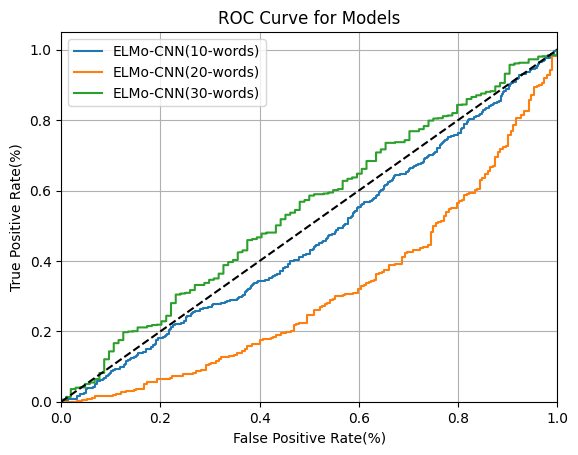

In [27]:
#create ROC curve
plt.plot(elmo_cnn10_fpr, elmo_cnn10_tpr, label='ELMo-CNN(10-words)')
plt.plot(elmo_cnn20_fpr, elmo_cnn20_tpr, label='ELMo-CNN(20-words)')
plt.plot(elmo_cnn30_fpr, elmo_cnn30_tpr, label='ELMo-CNN(30-words)')
# plt.plot(elmo_bilstm10_fpr, elmo_bilstm10_tpr, label='ELMo-BiLSTM(10-words)')
# plt.plot(elmo_bilstm20_fpr, elmo_bilstm20_tpr, label='ELMo-BiLSTM(20-words)')
# plt.plot(elmo_bilstm30_fpr, elmo_bilstm30_tpr, label='ELMo-BiLSTM(30-words)')
# plt.plot(elmo_cnn_bilstm10_fpr, elmo_cnn_bilstm10_tpr, label='ELMo-CNN_BiLSTM(10-words)')
# plt.plot(elmo_cnn_bilstm20_fpr, elmo_cnn_bilstm20_tpr, label='ELMo-CNN_BiLSTM(20-words)')
# plt.plot(elmo_cnn_bilstm30_fpr, elmo_cnn_bilstm30_tpr, label='ELMo-CNN_BiLSTM(30-words)')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC Curve for Models')
plt.grid()
plt.ylabel('True Positive Rate(%)')
plt.xlabel('False Positive Rate(%)')
plt.legend(loc='upper left')
plt.show()

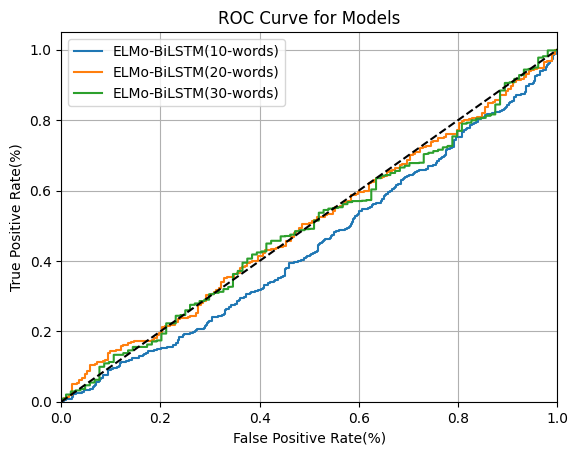

In [28]:
#create ROC curve
plt.plot(elmo_bilstm10_fpr, elmo_bilstm10_tpr, label='ELMo-BiLSTM(10-words)')
plt.plot(elmo_bilstm20_fpr, elmo_bilstm20_tpr, label='ELMo-BiLSTM(20-words)')
plt.plot(elmo_bilstm30_fpr, elmo_bilstm30_tpr, label='ELMo-BiLSTM(30-words)')
# plt.plot(elmo_cnn_bilstm10_fpr, elmo_cnn_bilstm10_tpr, label='ELMo-CNN_BiLSTM(10-words)')
# plt.plot(elmo_cnn_bilstm20_fpr, elmo_cnn_bilstm20_tpr, label='ELMo-CNN_BiLSTM(20-words)')
# plt.plot(elmo_cnn_bilstm30_fpr, elmo_cnn_bilstm30_tpr, label='ELMo-CNN_BiLSTM(30-words)')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC Curve for Models')
plt.grid()
plt.ylabel('True Positive Rate(%)')
plt.xlabel('False Positive Rate(%)')
plt.legend(loc='upper left')
plt.show()

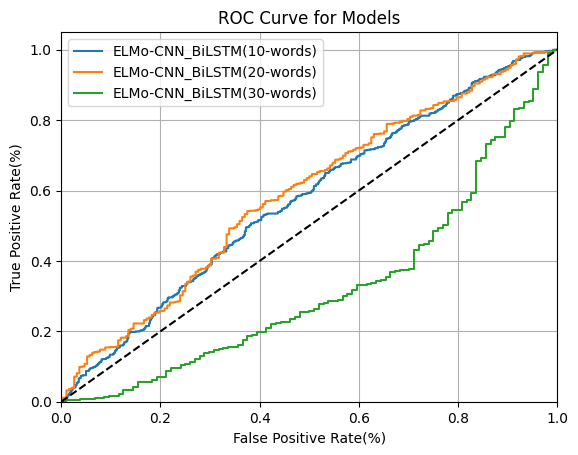

In [29]:
##create ROC curve
plt.plot(elmo_cnn_bilstm10_fpr, elmo_cnn_bilstm10_tpr, label='ELMo-CNN_BiLSTM(10-words)')
plt.plot(elmo_cnn_bilstm20_fpr, elmo_cnn_bilstm20_tpr, label='ELMo-CNN_BiLSTM(20-words)')
plt.plot(elmo_cnn_bilstm30_fpr, elmo_cnn_bilstm30_tpr, label='ELMo-CNN_BiLSTM(30-words)')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC Curve for Models')
plt.grid()
plt.ylabel('True Positive Rate(%)')
plt.xlabel('False Positive Rate(%)')
plt.legend(loc='upper left')
plt.show()

In [30]:
# cup cuda checking
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [31]:
# ===============================Nltk abstract_words tokenize======================================
with open('/content/FGFSJournal.txt', 'rt', encoding='UTF8') as file:
    FGFS_abstract = []
    for line in file:
        if '<abstract>' in line:
            abstract = line.split('</abstract>')[0].split('<abstract>')[-1]
            abstract = ''.join(i for i in abstract if not i.isdigit())
            abstract = regex.sub('[^\w\d\s]+', '', abstract)
            ##abstract = nltk.sent_tokenize(abstract)
            abstract = nltk.word_tokenize(abstract)
            stop_words = set(stopwords.words('english'))
            filtered_sentence_abstract = [w.lower() for w in abstract if
                                          w.lower() not in punctuation and w.lower() not in stop_words]
            tagged_list = nltk.pos_tag(filtered_sentence_abstract)
            nouns_list = [t[0] for t in tagged_list if t[-1] == 'NN']
            lm = WordNetLemmatizer()
            singluar_form = [lm.lemmatize(w, pos='v') for w in nouns_list]
            FGFS_abstract.append(singluar_form)

print("FGCS data:", len(FGFS_abstract))


FGCS data: 5659


In [72]:
#======================================================train_labels==========================================================================
ten_words = ['paper', 'system', 'performance', 'network', 'model', 'service', 'time', 'information', 'approach', 'cloud']
twenty_words = ['paper', 'system', 'performance', 'network', 'model', 'service', 'time', 'information', 'approach', 'cloud',
                'problem', 'process', 'security', 'analysis', 'application', 'method', 'research', 'framework', 'number', 'resource']
thirty_words = ['paper', 'system', 'performance', 'network', 'model', 'service', 'time', 'information', 'approach', 'cloud',
                'problem', 'process', 'security', 'analysis', 'application', 'method', 'research', 'framework', 'number', 'resource',
               'environment', 'algorithm', 'energy', 'management', 'architecture', 'access', 'scheme', 'communication', 'execution', 'order']


counts = 3

##==============================10-words label==================================
ten_words_labels = []

for i in range(0, 5659):
    count = 0
    for j in range(0, len(ten_words)):
        if ten_words[j] in FGFS_abstract[i]:
            count += 1
    if count >=counts:
        ten_words_labels.append(1)
    else:
        ten_words_labels.append(0)

print("ten_words_labels:", len(ten_words_labels))

##==============================20-words label==================================
twenty_words_labels = []

for i in range(0, 5659):
    count = 0
    for j in range(0, len(twenty_words)):
        if twenty_words[j] in FGFS_abstract[i]:
            count += 1
    if count >=counts:
        twenty_words_labels.append(1)
    else:
        twenty_words_labels.append(0)

print("twenty_words_labels:", len(twenty_words_labels))

##==============================30-words label==================================
thrity_words_labels = []

for i in range(0, 5659):
    count = 0
    for j in range(0, len(thirty_words)):
        if thirty_words[j] in FGFS_abstract[i]:
            count += 1
    if count >=counts:
        thrity_words_labels.append(1)
    else:
        thrity_words_labels.append(0)

print("thrity_words_labels:", len(thrity_words_labels))


# ##==============================10-words Multi-label==================================
# ten_words_labels = []

# for doc in FGFS_abstract:
#     label = []
#     for term in ten_words:
#         if term in doc:
#             label.append(1)
#         else:
#             label.append(0)
#     ten_words_labels.append(label)

# print("ten_words_labels:", len(ten_words_labels))

# ##==============================20-words Multi-label==================================
# twenty_words_labels = []

# for doc in FGFS_abstract:
#     label = []
#     for term in twenty_words:
#         if term in doc:
#             label.append(1)
#         else:
#             label.append(0)
#     twenty_words_labels.append(label)

# print("twenty_words_labels:", len(twenty_words_labels))

# ##==============================30-words Multi-label==================================
# thrity_words_labels = []
# for doc in FGFS_abstract:
#     label = []
#     for term in ten_words:
#         if term in doc:
#             label.append(1)
#         else:
#             label.append(0)
#     thrity_words_labels.append(label)

# print("thrity_words_labelss:", len(thrity_words_labels))

ten_words_labels: 5659
twenty_words_labels: 5659
thrity_words_labels: 5659


In [33]:
##=================================Bert_fine-tuning for sequence model==========================
# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

# cup cuda checking
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# ===============================================================================================
# checking the sentences line that is 156
max_len = 0

# For every sentence...
for sent in FGFS_abstract:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

##===============================================================================================

# Doing attention masking
input_ids = []
attention_masks = []

# For every abstracts...
for article in FGFS_abstract:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
        article,  # Sentence to encode.
        add_special_tokens=True,  # Add '[CLS]' and '[SEP]'
        max_length=max_len,  # Pad & truncate all sentences.
        pad_to_max_length=True,
        return_attention_mask=True,  # Construct attn. masks.
        return_tensors='pt',  # Return pytorch tensors.
    )

    # Add the encoded sentence to the list.
    input_ids.append(encoded_dict['input_ids'])

    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
ten_labels = torch.tensor(ten_words_labels)
twenty_labels = torch.tensor(twenty_words_labels)
thrity_labels = torch.tensor(thrity_words_labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', article[0])
print('Token IDs:', input_ids[0])


##=========================================================================
ten_words_labels = torch.tensor(ten_words_labels)
twenty_words_labels = torch.tensor(twenty_words_labels)
thrity_words_labels = torch.tensor(thrity_words_labels)

# Combine the training inputs into a TensorDataset.
dataset1 = TensorDataset(input_ids, attention_masks, ten_words_labels)
dataset2 = TensorDataset(input_ids, attention_masks, twenty_words_labels)
dataset3 = TensorDataset(input_ids, attention_masks, thrity_words_labels)

# Create a 70-30 train-validation split.
# Calculate the number of 10_words_samples to include in each set.
train_size = int(0.7 * len(dataset1))
val_size = int(0.3 * len(dataset1))
val_size = len(dataset1) - train_size

# Calculate the number of 20_words_samples to include in each set.
train_size = int(0.8 * len(dataset2))
val_size = int(0.2 * len(dataset2))
val_size = len(dataset2) - train_size

# Calculate the number of 30_words_samples to include in each set.
train_size = int(0.8 * len(dataset3))
val_size = int(0.2 * len(dataset3))
val_size = len(dataset3) - train_size



# Divide the dataset by randomly selecting samples.
train_dataset1, val_dataset1 = random_split(dataset1, [train_size, val_size])
train_dataset2, val_dataset2 = random_split(dataset2, [train_size, val_size])
train_dataset3, val_dataset3 = random_split(dataset3, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

##===============================================================================================
# The DataLoader needs to know our batch size for training, so we specify it
# here. For fine-tuning BERT on a specific task, the authors recommend a batch
# size of 16 or 32.
batch_size = 16

# Create the DataLoaders for our training and validation sets.
# We'll take training 10_words samples in random order.
train_dataloader1 = DataLoader(
            train_dataset1,  # The training samples.
            sampler = RandomSampler(train_dataset1), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader1 = DataLoader(
            val_dataset1, # The validation samples.
            sampler = SequentialSampler(val_dataset1), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

##================================================================================================
# We'll take training 20_words samples in random order.
train_dataloader2 = DataLoader(
            train_dataset2,  # The training samples.
            sampler = RandomSampler(train_dataset2), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader2 = DataLoader(
            val_dataset2, # The validation samples.
            sampler = SequentialSampler(val_dataset2), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

##================================================================================================
# We'll take training 30_words samples in random order.
train_dataloader3 = DataLoader(
            train_dataset3,  # The training samples.
            sampler = RandomSampler(train_dataset3), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader3 = DataLoader(
            val_dataset3, # The validation samples.
            sampler = SequentialSampler(val_dataset3), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

cuda:0


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Max sentence length:  156


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2301: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Original:  growth
Token IDs: tensor([  101,  4294, 28937,   102,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,

In [34]:
# ===========================================================================
CUDA_VISIBLE_DEVICES=0,1
tuned_model = BertForSequenceClassification.from_pretrained('bert-base-uncased')


# Load BertForSequenceClassification, the pretrained BERT model with a single
class BertCNNClassifier(nn.Module):
    def __init__(self, tuned_model, embed_num = 512, embed_dim = 768, dropout=0.1, kernel_num=3, kernel_sizes=[1,2], num_labels=2):
        super().__init__()
        self.num_labels = num_labels
        self.embed_num = embed_num
        self.embed_dim = embed_dim
        self.dropout = dropout
        self.kernel_num = kernel_num
        self.kernel_sizes = kernel_sizes
        self.softmax = nn.functional.softmax

        self.bert = tuned_model.bert
        self.convs = nn.ModuleList([nn.Conv2d(1, self.kernel_num, (k, self.embed_dim)) for k in self.kernel_sizes])
        self.dropout = nn.Dropout(self.dropout)
        self.classifier = nn.Linear(len(self.kernel_sizes)*self.kernel_num, self.num_labels)

    def forward(self, input_ids, attention_mask, token_type_ids = None):
        output = self.bert(input_ids = input_ids, attention_mask = attention_mask, token_type_ids = token_type_ids) #16,512,768
        output = output[0].unsqueeze(1) #16,1,512,768
        output = [nn.functional.relu(conv(output)).squeeze(3) for conv in self.convs] #16,3,508,1 => #16,3,508
        output = [nn.functional.max_pool1d(i, i.size(2)).squeeze(2) for i in output] #=> 16,3
        output = torch.cat(output, 1)
        output = self.dropout(output)
        logits = self.classifier(output)
        return self.softmax(logits, 1)

# ======================================================================================

# Initializing model
model1 = BertCNNClassifier(tuned_model=tuned_model)
model1.to(device)

# ================================================================================
# set parameters
epochs = 4

optimizer = torch.optim.AdamW(model1.parameters(),
                  lr=5e-5,  # args.learning_rate - default is 5e-5.
                  eps=1e-8  # args.adam_epsilon  - default is 1e-8.
                )
criterion = nn.CrossEntropyLoss()
# ===========================Fine-tuning model===========================================
# Number of training epochs. The BERT authors recommend between 2 and 4.
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 4

# 10_words number of training steps is [number of batches] x [number of epochs].
# (Note that this is not the same as the number of training samples).
total_steps1 = len(train_dataloader1) * epochs

# Create the learning rate scheduler.
scheduler1 = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps=0,  # Default value in run_glue.py
                                            num_training_steps=total_steps1)

##================================================================================================
# 20_words number of training steps is [number of batches] x [number of epochs].
total_steps2 = len(train_dataloader2) * epochs

# Create the learning rate scheduler.
scheduler2 = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps=0,  # Default value in run_glue.py
                                            num_training_steps=total_steps2)

##================================================================================================
# 30_words number of training steps is [number of batches] x [number of epochs].
total_steps3 = len(train_dataloader3) * epochs

# Create the learning rate scheduler.
scheduler3 = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps=0,  # Default value in run_glue.py
                                            num_training_steps=total_steps3)


Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

#BERT+CNN with Ten words

In [35]:


## Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)


def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

##=====================================================================================
seed_val = 42
random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

training_stats = []
total_t0 = time.time()
best_accuracy = 0
for epoch_i in range(0, epochs):
    #Training
    print("")
    print('Epoch {:} / {:}'.format(epoch_i + 1, epochs))
    print('Training...')

    t0 = time.time()
    total_train_loss = 0
    total_train_accuracy = 0
    model1.train()
    for step, batch in enumerate(train_dataloader1):

        input_ids = batch[0].to(device)
        input_mask = batch[1].to(device)
        labels = batch[2].to(device)

        model1.zero_grad()
        out = model1(input_ids = input_ids, attention_mask = input_mask, token_type_ids = None)
        loss = criterion(out, labels)
        total_train_loss += loss.item()

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model1.parameters(), 1.0)
        optimizer.step()

        pred = torch.argmax(out, dim = 1)
        total_train_accuracy +=  torch.sum(pred == labels).item()

    avg_train_accuracy = total_train_accuracy / len(train_dataloader1)
    avg_train_loss = total_train_loss / len(train_dataloader1)
    print("  BERT+CNN_10_Words Accuracy: {}".format(avg_train_accuracy))
    print("  BERT+CNN_10_Words Training loss: {}".format(avg_train_loss))

    # Validation
    print("")
    print("Validation...")
    model1.eval()
    total_eval_accuracy = 0
    total_eval_loss = 0
    y_true = []
    y_pred = []

    for batch in validation_dataloader1:
        input_ids = batch[0].to(device)
        input_mask = batch[1].to(device)
        labels = batch[2].to(device)

        with torch.no_grad():
            out = model1(input_ids = input_ids, attention_mask = input_mask, token_type_ids = None)
        loss = criterion(out, labels)
        total_eval_loss += loss.item()
        pred = torch.argmax(out, dim = 1)
        total_eval_accuracy += torch.sum(pred == labels).item()
        y_true.append(labels.flatten())
        y_pred.append(pred.flatten())

    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader1)
    print("  BERT+CNN_10_Words Accuracy: {}".format(avg_val_accuracy))
    avg_val_loss = total_eval_loss / len(validation_dataloader1)
    print("  BERT+CNN_10_Words Validation loss: {}".format(avg_val_loss))
    training_time = format_time(time.time() - t0)
    print("  BERT+CNN_10_Words This epoch took: {:}".format(training_time))
    print()
    y_true = torch.cat(y_true).tolist()
    y_pred = torch.cat(y_pred).tolist()
    print('  BERT+CNN_10_Words roc_auc score: ', roc_auc_score(y_true,y_pred))
    print('  BERT+CNN_10_Words F1 score:', f1_score(y_true, y_pred))
    bert_cnn10_fpr, bert_cnn10_tpr, bert_cnn10_thresholds = roc_curve(y_true, y_pred)


    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Train Accur.': avg_train_accuracy,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
        }
    )

    if avg_val_accuracy > best_accuracy:
        best_accuracy = avg_val_accuracy
        best_model = model1



print("===")
print("Summary")
print("BERT+CNN_10_Words Total time {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))
print('BERT+CNN_10_Words best acc:', accuracy_score(y_true, y_pred))


Epoch 1 / 4
Training...
  BERT+CNN_10_Words Accuracy: 12.551236749116608
  BERT+CNN_10_Words Training loss: 0.5202905887428526

Validation...
  BERT+CNN_10_Words Accuracy: 14.098591549295774
  BERT+CNN_10_Words Validation loss: 0.4244512907216247
  BERT+CNN_10_Words This epoch took: 0:02:21

  BERT+CNN_10_Words roc_auc score:  0.870961145194274
  BERT+CNN_10_Words F1 score: 0.9051412020275164

Epoch 2 / 4
Training...
  BERT+CNN_10_Words Accuracy: 14.448763250883392
  BERT+CNN_10_Words Training loss: 0.4109104101944307

Validation...
  BERT+CNN_10_Words Accuracy: 15.056338028169014
  BERT+CNN_10_Words Validation loss: 0.367410723172443
  BERT+CNN_10_Words This epoch took: 0:02:21

  BERT+CNN_10_Words roc_auc score:  0.9365733640081799
  BERT+CNN_10_Words F1 score: 0.9533678756476685

Epoch 3 / 4
Training...
  BERT+CNN_10_Words Accuracy: 14.929328621908127
  BERT+CNN_10_Words Training loss: 0.38118670485887424

Validation...
  BERT+CNN_10_Words Accuracy: 14.788732394366198
  BERT+CNN_10

BERT+ cnn with twenty words

In [37]:
##=====================================================================================
seed_val = 42
random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

training_stats = []
total_t0 = time.time()
best_accuracy = 0
for epoch_i in range(0, epochs):
    #Training
    print("")
    print('Epoch {:} / {:}'.format(epoch_i + 1, epochs))
    print('Training...')

    t0 = time.time()
    total_train_loss = 0
    total_train_accuracy = 0
    model1.train()
    for step, batch in enumerate(train_dataloader2):

        input_ids = batch[0].to(device)
        input_mask = batch[1].to(device)
        labels = batch[2].to(device)

        model1.zero_grad()
        out = model1(input_ids = input_ids, attention_mask = input_mask, token_type_ids = None)
        loss = criterion(out, labels)
        total_train_loss += loss.item()

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model1.parameters(), 1.0)
        optimizer.step()

        pred = torch.argmax(out, dim = 1)
        total_train_accuracy +=  torch.sum(pred == labels).item()

    avg_train_accuracy = total_train_accuracy / len(train_dataloader2)
    avg_train_loss = total_train_loss / len(train_dataloader2)
    print("  BERT+CNN_20_Words Accuracy: {}".format(avg_train_accuracy))
    print("  Training loss: {}".format(avg_train_loss))

    # Validation
    print("")
    print("Validation...")
    model1.eval()
    total_eval_accuracy = 0
    total_eval_loss = 0
    y_true = []
    y_pred = []

    for batch in validation_dataloader1:
        input_ids = batch[0].to(device)
        input_mask = batch[1].to(device)
        labels = batch[2].to(device)

        with torch.no_grad():
            out = model1(input_ids = input_ids, attention_mask = input_mask, token_type_ids = None)
        loss = criterion(out, labels)
        total_eval_loss += loss.item()
        pred = torch.argmax(out, dim = 1)
        total_eval_accuracy += torch.sum(pred == labels).item()
        y_true.append(labels.flatten())
        y_pred.append(pred.flatten())

    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader2)
    print("  BERT+CNN_20_Words Accuracy: {}".format(avg_val_accuracy))
    avg_val_loss = total_eval_loss / len(validation_dataloader2)
    print("  BERT+CNN_20_Words Validation loss: {}".format(avg_val_loss))
    training_time = format_time(time.time() - t0)
    print("  BERT+CNN_20_Words  This epoch took: {:}".format(training_time))
    print()
    y_true = torch.cat(y_true).tolist()
    y_pred = torch.cat(y_pred).tolist()
    print('  BERT+CNN_20_Words  roc_auc score: ', roc_auc_score(y_true,y_pred))
    print('  BERT+CNN_20_Words  F1 score:',f1_score(y_true, y_pred))
    bert_cnn20_fpr, bert_cnn20_tpr, bert_cnn20_thresholds = roc_curve(y_true, y_pred)


    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Train Accur.': avg_train_accuracy,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
        }
    )

    if avg_val_accuracy > best_accuracy:
        best_accuracy = avg_val_accuracy
        best_model = model1




print("===")
print("Summary")
print("BERT+CNN_20_Words Total time {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))
print('BERT+CNN_20_Words best acc:', accuracy_score(y_true, y_pred))


Epoch 1 / 4
Training...
  BERT+CNN_20_Words Accuracy: 14.183745583038869
  Training loss: 0.42923577250945694

Validation...
  BERT+CNN_20_Words Accuracy: 12.098591549295774
  BERT+CNN_20_Words Validation loss: 0.6107576031919936
  BERT+CNN_20_Words  This epoch took: 0:02:20

  BERT+CNN_20_Words  roc_auc score:  0.715625
  BERT+CNN_20_Words  F1 score: 0.8268864933417883

Epoch 2 / 4
Training...
  BERT+CNN_20_Words Accuracy: 14.169611307420494
  Training loss: 0.43532776284976055

Validation...
  BERT+CNN_20_Words Accuracy: 10.408450704225352
  BERT+CNN_20_Words Validation loss: 0.683860784685108
  BERT+CNN_20_Words  This epoch took: 0:02:20

  BERT+CNN_20_Words  roc_auc score:  0.590625
  BERT+CNN_20_Words  F1 score: 0.7684148497348262

Epoch 3 / 4
Training...
  BERT+CNN_20_Words Accuracy: 14.247349823321555
  Training loss: 0.4265781308231421

Validation...
  BERT+CNN_20_Words Accuracy: 10.633802816901408
  BERT+CNN_20_Words Validation loss: 0.6738408220485902
  BERT+CNN_20_Words  Th

BERT+CNN with thirty words

In [38]:
##=====================================================================================
seed_val = 42
random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

training_stats = []
total_t0 = time.time()
best_accuracy = 0
for epoch_i in range(0, epochs):
    #Training
    print("")
    print('Epoch {:} / {:}'.format(epoch_i + 1, epochs))
    print('Training...')

    t0 = time.time()
    total_train_loss = 0
    total_train_accuracy = 0
    model1.train()
    for step, batch in enumerate(train_dataloader3):

        input_ids = batch[0].to(device)
        input_mask = batch[1].to(device)
        labels = batch[2].to(device)

        model1.zero_grad()
        out = model1(input_ids = input_ids, attention_mask = input_mask, token_type_ids = None)
        loss = criterion(out, labels)
        total_train_loss += loss.item()

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model1.parameters(), 1.0)
        optimizer.step()

        pred = torch.argmax(out, dim = 1)
        total_train_accuracy +=  torch.sum(pred == labels).item()

    avg_train_accuracy = total_train_accuracy / len(train_dataloader3)
    avg_train_loss = total_train_loss / len(train_dataloader3)
    print("  BERT+CNN_30_Words Accuracy: {}".format(avg_train_accuracy))
    print("  BERT+CNN_30_Words Training loss: {}".format(avg_train_loss))

    # Validation
    print("")
    print("Validation...")
    model1.eval()
    total_eval_accuracy = 0
    total_eval_loss = 0
    y_true = []
    y_pred = []

    for batch in validation_dataloader1:
        input_ids = batch[0].to(device)
        input_mask = batch[1].to(device)
        labels = batch[2].to(device)

        with torch.no_grad():
            out = model1(input_ids = input_ids, attention_mask = input_mask, token_type_ids = None)
        loss = criterion(out, labels)
        total_eval_loss += loss.item()
        pred = torch.argmax(out, dim = 1)
        total_eval_accuracy += torch.sum(pred == labels).item()
        y_true.append(labels.flatten())
        y_pred.append(pred.flatten())

    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader3)
    print("  BERT+CNN_30_Words Accuracy: {}".format(avg_val_accuracy))
    avg_val_loss = total_eval_loss / len(validation_dataloader3)
    print("  BERT+CNN_30_Words Validation loss: {}".format(avg_val_loss))
    training_time = format_time(time.time() - t0)
    print("  BERT+CNN_30_Words This epoch took: {:}".format(training_time))
    print()
    y_true = torch.cat(y_true).tolist()
    y_pred = torch.cat(y_pred).tolist()
    print('  BERT+CNN_30_Words roc_auc score: ', roc_auc_score(y_true,y_pred))
    print('  BERT+CNN_30_Words F1 score:',f1_score(y_true, y_pred))
    bert_cnn30_fpr, bert_cnn30_tpr, bert_cnn30_thresholds = roc_curve(y_true, y_pred)


    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Train Accur.': avg_train_accuracy,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
        }
    )

    if avg_val_accuracy > best_accuracy:
        best_accuracy = avg_val_accuracy
        best_model = model1



print("===")
print("Summary")
print("BERT+CNN_30_Words Total time {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))
print('BERT+CNN_30_Words best acc:', accuracy_score(y_true, y_pred))


Epoch 1 / 4
Training...
  BERT+CNN_30_Words Accuracy: 14.31095406360424
  BERT+CNN_30_Words Training loss: 0.3952984636116365

Validation...
  BERT+CNN_30_Words Accuracy: 10.873239436619718
  BERT+CNN_30_Words Validation loss: 0.6630889173124878
  BERT+CNN_30_Words This epoch took: 0:02:20

  BERT+CNN_30_Words roc_auc score:  0.625
  BERT+CNN_30_Words F1 score: 0.7836538461538461

Epoch 2 / 4
Training...
  BERT+CNN_30_Words Accuracy: 14.540636042402827
  BERT+CNN_30_Words Training loss: 0.3889668655479755

Validation...
  BERT+CNN_30_Words Accuracy: 11.225352112676056
  BERT+CNN_30_Words Validation loss: 0.6478403269405096
  BERT+CNN_30_Words This epoch took: 0:02:20

  BERT+CNN_30_Words roc_auc score:  0.6510416666666667
  BERT+CNN_30_Words F1 score: 0.7956070774862721

Epoch 3 / 4
Training...
  BERT+CNN_30_Words Accuracy: 14.434628975265017
  BERT+CNN_30_Words Training loss: 0.39091337274746846

Validation...
  BERT+CNN_30_Words Accuracy: 11.098591549295774
  BERT+CNN_30_Words Valid

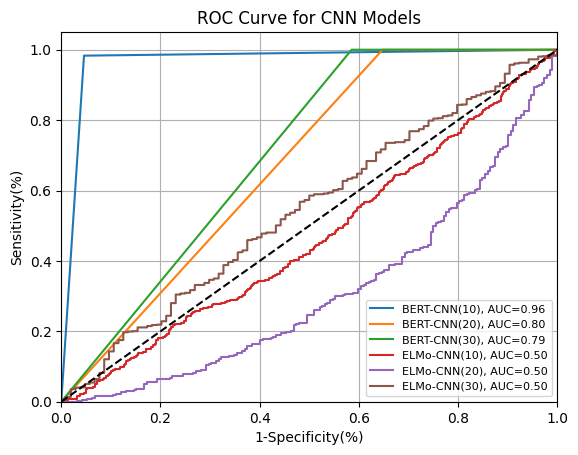

In [60]:
#create ROC curve
plt.plot(bert_cnn10_fpr, bert_cnn10_tpr, label='BERT-CNN(10), AUC=0.96')
plt.plot(bert_cnn20_fpr, bert_cnn20_tpr, label='BERT-CNN(20), AUC=0.80')
plt.plot(bert_cnn30_fpr, bert_cnn30_tpr, label='BERT-CNN(30), AUC=0.79')
plt.plot(elmo_cnn10_fpr, elmo_cnn10_tpr, label='ELMo-CNN(10), AUC=0.50')
plt.plot(elmo_cnn20_fpr, elmo_cnn20_tpr, label='ELMo-CNN(20), AUC=0.50')
plt.plot(elmo_cnn30_fpr, elmo_cnn30_tpr, label='ELMo-CNN(30), AUC=0.50')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC Curve for CNN Models')
plt.grid()
plt.ylabel('Sensitivity(%)')
plt.xlabel('1-Specificity(%)')
plt.legend(loc='lower right', fontsize=8)
plt.show()

# BERT + BiLSTM model

In [86]:
class BertLstmClassifier(nn.Module):
    def __init__(self, model_tune):
        super().__init__()
        self.bert = model_tune.bert
        self.lstm = nn.LSTM(input_size = 768,
                            hidden_size = 768,
                            num_layers = 1,
                            batch_first = True,
                            bidirectional = True)
        self.classifier = nn.Linear(768 * 2, 2)
        self.softmax = nn.Softmax(dim = 1)

    def forward(self, input_ids, attention_mask, token_type_ids):
        bert_output = self.bert(input_ids = input_ids, attention_mask = attention_mask, token_type_ids = token_type_ids)
        out, _ = self.lstm(bert_output[0])
        logits = self.classifier(out[:, 1, :])
        return self.softmax(logits)

# Initializing model
model2 = BertCNNClassifier(tuned_model=tuned_model)
model2.to(device)
# set parameters
epochs = 4
learning_rate = 5e-5
optimizer = AdamW(model2.parameters(), lr = learning_rate)
criterion = nn.CrossEntropyLoss()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


BERT+ bilstm with ten words

In [87]:

seed_val = 42

random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

training_stats = []
total_t0 = time.time()
best_accuracy = 0
for epoch_i in range(0, epochs):
    #Training
    print("")
    print('Epoch {:} / {:}'.format(epoch_i + 1, epochs))
    print('Training...')

    t0 = time.time()
    total_train_loss = 0
    total_train_accuracy = 0
    model2.train()
    for step, batch in enumerate(train_dataloader1):

        input_ids = batch[0].to(device)
        input_mask = batch[1].to(device)
        labels = batch[2].to(device)

        model2.zero_grad()
        out = model2(input_ids = input_ids, attention_mask = input_mask, token_type_ids = None)
        loss = criterion(out, labels)
        total_train_loss += loss.item()

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model2.parameters(), 1.0)
        optimizer.step()

        pred = torch.argmax(out, dim = 1)
        total_train_accuracy +=  torch.sum(pred == labels).item()

    avg_train_accuracy = total_train_accuracy / len(train_dataloader1)
    avg_train_loss = total_train_loss / len(train_dataloader1)
    print("  BERT+BiLSTM_10_words Accuracy: {}".format(avg_train_accuracy))
    print("  BERT+BiLSTM_10_words Training loss: {}".format(avg_train_loss))

    # Validation
    print("")
    print("Validation...")
    model2.eval()
    total_eval_accuracy = 0
    total_eval_loss = 0
    y_true = []
    y_pred = []

    for batch in validation_dataloader1:
        input_ids = batch[0].to(device)
        input_mask = batch[1].to(device)
        labels = batch[2].to(device)

        with torch.no_grad():
            out = model2(input_ids = input_ids, attention_mask = input_mask, token_type_ids = None)
        loss = criterion(out, labels)
        total_eval_loss += loss.item()
        pred = torch.argmax(out, dim = 1)
        total_eval_accuracy += torch.sum(pred == labels).item()
        y_true.append(labels.flatten())
        y_pred.append(pred.flatten())

    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader1)
    print("  BERT+BiLSTM_10_words Accuracy: {}".format(avg_val_accuracy))
    avg_val_loss = total_eval_loss / len(validation_dataloader1)
    print("  BERT+BiLSTM_10_words Validation loss: {}".format(avg_val_loss))
    training_time = format_time(time.time() - t0)
    print("  BERT+BiLSTM_10_words This epoch took: {:}".format(training_time))
    print()
    y_true = torch.cat(y_true).tolist()
    y_pred = torch.cat(y_pred).tolist()
    print('  BERT+BiLSTM_10_words roc_auc score: ', roc_auc_score(y_true,y_pred))
    print('  BERT+BiLSTM_10_words F1 score:',f1_score(y_true, y_pred))
    bert_bilstm10_fpr, bert_bilstm10_tpr, bert_bilstm10_thresholds = roc_curve(y_true, y_pred)


    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Train Accur.': avg_train_accuracy,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
        }
    )

    if avg_val_accuracy > best_accuracy:
        best_accuracy = avg_val_accuracy
        best_model = model2



print("===")
print("Summary")
print("BERT+BiLSTM_10_words Total time {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))
print('BERT+BiLSTM_10_words best acc:',accuracy_score(y_true, y_pred))


Epoch 1 / 4
Training...
  BERT+BiLSTM_10_words Accuracy: 9.54416961130742
  BERT+BiLSTM_10_words Training loss: 0.6689606631181265

Validation...
  BERT+BiLSTM_10_words Accuracy: 9.183098591549296
  BERT+BiLSTM_10_words Validation loss: 0.6800612597398354
  BERT+BiLSTM_10_words This epoch took: 0:02:18

  BERT+BiLSTM_10_words roc_auc score:  0.5
  BERT+BiLSTM_10_words F1 score: 0.7309417040358743

Epoch 2 / 4
Training...
  BERT+BiLSTM_10_words Accuracy: 9.57243816254417
  BERT+BiLSTM_10_words Training loss: 0.6723840440962424

Validation...
  BERT+BiLSTM_10_words Accuracy: 9.183098591549296
  BERT+BiLSTM_10_words Validation loss: 0.6808301957560258
  BERT+BiLSTM_10_words This epoch took: 0:02:17

  BERT+BiLSTM_10_words roc_auc score:  0.5
  BERT+BiLSTM_10_words F1 score: 0.7309417040358743

Epoch 3 / 4
Training...
  BERT+BiLSTM_10_words Accuracy: 9.57243816254417
  BERT+BiLSTM_10_words Training loss: 0.6724251826744618

Validation...
  BERT+BiLSTM_10_words Accuracy: 9.183098591549296


BERT+ bilstm twenty words

In [88]:
seed_val = 42

random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

training_stats = []
total_t0 = time.time()
best_accuracy = 0
for epoch_i in range(0, epochs):
    #Training
    print("")
    print('Epoch {:} / {:}'.format(epoch_i + 1, epochs))
    print('Training...')

    t0 = time.time()
    total_train_loss = 0
    total_train_accuracy = 0
    model2.train()
    for step, batch in enumerate(train_dataloader2):

        input_ids = batch[0].to(device)
        input_mask = batch[1].to(device)
        labels = batch[2].to(device)

        model2.zero_grad()
        out = model2(input_ids = input_ids, attention_mask = input_mask, token_type_ids = None)
        loss = criterion(out, labels)
        total_train_loss += loss.item()

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model2.parameters(), 1.0)
        optimizer.step()

        pred = torch.argmax(out, dim = 1)
        total_train_accuracy +=  torch.sum(pred == labels).item()

    avg_train_accuracy = total_train_accuracy / len(train_dataloader2)
    avg_train_loss = total_train_loss / len(train_dataloader2)
    print("  BERT+BiLSTM_20_words Accuracy: {}".format(avg_train_accuracy))
    print("  BERT+BiLSTM_20_words Training loss: {}".format(avg_train_loss))

    # Validation
    print("")
    print("Validation...")
    model2.eval()
    total_eval_accuracy = 0
    total_eval_loss = 0
    y_true = []
    y_pred = []

    for batch in validation_dataloader1:
        input_ids = batch[0].to(device)
        input_mask = batch[1].to(device)
        labels = batch[2].to(device)

        with torch.no_grad():
            out = model2(input_ids = input_ids, attention_mask = input_mask, token_type_ids = None)
        loss = criterion(out, labels)
        total_eval_loss += loss.item()
        pred = torch.argmax(out, dim = 1)
        total_eval_accuracy += torch.sum(pred == labels).item()
        y_true.append(labels.flatten())
        y_pred.append(pred.flatten())

    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader2)
    print("  BERT+BiLSTM_20_words Accuracy: {}".format(avg_val_accuracy))
    avg_val_loss = total_eval_loss / len(validation_dataloader2)
    print("  BERT+BiLSTM_20_words Validation loss: {}".format(avg_val_loss))
    training_time = format_time(time.time() - t0)
    print("  BERT+BiLSTM_20_words This epoch took: {:}".format(training_time))
    print()
    y_true = torch.cat(y_true).tolist()
    y_pred = torch.cat(y_pred).tolist()
    print('  BERT+BiLSTM_20_words roc_auc score: ', roc_auc_score(y_true,y_pred))
    print('  BERT+BiLSTM_20_words F1 score:',f1_score(y_true, y_pred))
    bert_bilstm20_fpr, bert_bilstm20_tpr, bert_bilstm20_thresholds = roc_curve(y_true, y_pred)


    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Train Accur.': avg_train_accuracy,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
        }
    )

    if avg_val_accuracy > best_accuracy:
        best_accuracy = avg_val_accuracy
        best_model = model2



print("===")
print("Summary")
print("BERT+BiLSTM_20_words Total time {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))
print('BERT+BiLSTM_20_words best acc:',accuracy_score(y_true, y_pred))


Epoch 1 / 4
Training...
  BERT+BiLSTM_20_words Accuracy: 13.462897526501767
  BERT+BiLSTM_20_words Training loss: 0.47282082495335553

Validation...
  BERT+BiLSTM_20_words Accuracy: 9.183098591549296
  BERT+BiLSTM_20_words Validation loss: 0.7330927815235836
  BERT+BiLSTM_20_words This epoch took: 0:02:17

  BERT+BiLSTM_20_words roc_auc score:  0.5
  BERT+BiLSTM_20_words F1 score: 0.7309417040358743

Epoch 2 / 4
Training...
  BERT+BiLSTM_20_words Accuracy: 13.462897526501767
  BERT+BiLSTM_20_words Training loss: 0.4683957694907913

Validation...
  BERT+BiLSTM_20_words Accuracy: 9.183098591549296
  BERT+BiLSTM_20_words Validation loss: 0.7022037846101842
  BERT+BiLSTM_20_words This epoch took: 0:02:17

  BERT+BiLSTM_20_words roc_auc score:  0.5
  BERT+BiLSTM_20_words F1 score: 0.7309417040358743

Epoch 3 / 4
Training...
  BERT+BiLSTM_20_words Accuracy: 13.462897526501767
  BERT+BiLSTM_20_words Training loss: 0.44543360916127583

Validation...
  BERT+BiLSTM_20_words Accuracy: 9.18309859

BERT + bilstm with thirty words

In [89]:
seed_val = 42

random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

training_stats = []
total_t0 = time.time()
best_accuracy = 0
for epoch_i in range(0, epochs):
    #Training
    print("")
    print('Epoch {:} / {:}'.format(epoch_i + 1, epochs))
    print('Training...')

    t0 = time.time()
    total_train_loss = 0
    total_train_accuracy = 0
    model2.train()
    for step, batch in enumerate(train_dataloader3):

        input_ids = batch[0].to(device)
        input_mask = batch[1].to(device)
        labels = batch[2].to(device)

        model2.zero_grad()
        out = model2(input_ids = input_ids, attention_mask = input_mask, token_type_ids = None)
        loss = criterion(out, labels)
        total_train_loss += loss.item()

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model2.parameters(), 1.0)
        optimizer.step()

        pred = torch.argmax(out, dim = 1)
        total_train_accuracy +=  torch.sum(pred == labels).item()

    avg_train_accuracy = total_train_accuracy / len(train_dataloader3)
    avg_train_loss = total_train_loss / len(train_dataloader3)
    print("  BERT+BiLSTM_30_words Accuracy: {}".format(avg_train_accuracy))
    print("  BERT+BiLSTM_30_words Training loss: {}".format(avg_train_loss))

    # Validation
    print("")
    print("Validation...")
    model2.eval()
    total_eval_accuracy = 0
    total_eval_loss = 0
    y_true = []
    y_pred = []

    for batch in validation_dataloader1:
        input_ids = batch[0].to(device)
        input_mask = batch[1].to(device)
        labels = batch[2].to(device)

        with torch.no_grad():
            out = model2(input_ids = input_ids, attention_mask = input_mask, token_type_ids = None)
        loss = criterion(out, labels)
        total_eval_loss += loss.item()
        pred = torch.argmax(out, dim = 1)
        total_eval_accuracy += torch.sum(pred == labels).item()
        y_true.append(labels.flatten())
        y_pred.append(pred.flatten())

    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader3)
    print("  BERT+BiLSTM_30_words Accuracy: {}".format(avg_val_accuracy))
    avg_val_loss = total_eval_loss / len(validation_dataloader3)
    print("  BERT+BiLSTM_30_words Validation loss: {}".format(avg_val_loss))
    training_time = format_time(time.time() - t0)
    print("  BERT+BiLSTM_30_words This epoch took: {:}".format(training_time))
    print()
    y_true = torch.cat(y_true).tolist()
    y_pred = torch.cat(y_pred).tolist()
    print('  BERT+BiLSTM_30_words roc_auc score: ', roc_auc_score(y_true,y_pred))
    print('  BERT+BiLSTM_30_words F1 score:',f1_score(y_true, y_pred))
    bert_bilstm30_fpr, bert_bilstm30_tpr, bert_bilstm30_thresholds = roc_curve(y_true, y_pred)


    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Train Accur.': avg_train_accuracy,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
        }
    )

    if avg_val_accuracy > best_accuracy:
        best_accuracy = avg_val_accuracy
        best_model = model2



print("===")
print("Summary")
print("BERT+BiLSTM_30_words Total time {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))
print('BERT+BiLSTM_30_words best acc:',accuracy_score(y_true, y_pred))


Epoch 1 / 4
Training...
  BERT+BiLSTM_30_words Accuracy: 14.56183745583039
  BERT+BiLSTM_30_words Training loss: 0.39117432230352933

Validation...
  BERT+BiLSTM_30_words Accuracy: 9.183098591549296
  BERT+BiLSTM_30_words Validation loss: 0.6911237617613564
  BERT+BiLSTM_30_words This epoch took: 0:02:17

  BERT+BiLSTM_30_words roc_auc score:  0.5
  BERT+BiLSTM_30_words F1 score: 0.7309417040358743

Epoch 2 / 4
Training...
  BERT+BiLSTM_30_words Accuracy: 14.56183745583039
  BERT+BiLSTM_30_words Training loss: 0.3941584104152113

Validation...
  BERT+BiLSTM_30_words Accuracy: 9.183098591549296
  BERT+BiLSTM_30_words Validation loss: 0.659840078421042
  BERT+BiLSTM_30_words This epoch took: 0:02:17

  BERT+BiLSTM_30_words roc_auc score:  0.5
  BERT+BiLSTM_30_words F1 score: 0.7309417040358743

Epoch 3 / 4
Training...
  BERT+BiLSTM_30_words Accuracy: 14.56183745583039
  BERT+BiLSTM_30_words Training loss: 0.4258217826327671

Validation...
  BERT+BiLSTM_30_words Accuracy: 9.1830985915492

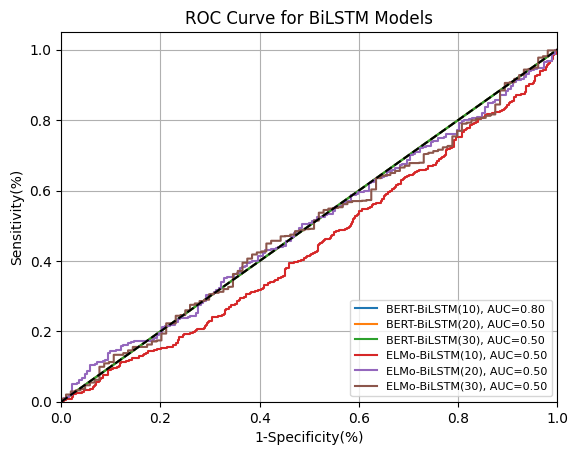

In [90]:
#create ROC curve
plt.plot(bert_bilstm10_fpr, bert_bilstm10_tpr, label='BERT-BiLSTM(10), AUC=0.80')
plt.plot(bert_bilstm20_fpr, bert_bilstm20_tpr, label='BERT-BiLSTM(20), AUC=0.50')
plt.plot(bert_bilstm30_fpr, bert_bilstm30_tpr, label='BERT-BiLSTM(30), AUC=0.50')
plt.plot(elmo_bilstm10_fpr, elmo_bilstm10_tpr, label='ELMo-BiLSTM(10), AUC=0.50')
plt.plot(elmo_bilstm20_fpr, elmo_bilstm20_tpr, label='ELMo-BiLSTM(20), AUC=0.50')
plt.plot(elmo_bilstm30_fpr, elmo_bilstm30_tpr, label='ELMo-BiLSTM(30), AUC=0.50')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC Curve for BiLSTM Models')
plt.grid()
plt.ylabel('Sensitivity(%)')
plt.xlabel('1-Specificity(%)')
plt.legend(loc='lower right', fontsize=8)
plt.show()

#BERT +CNN_bilstm model

In [73]:
class BertCNNBiLSTMClassifier(nn.Module):
    def __init__(self, tuned_model, embed_num = 512, embed_dim = 768, dropout=0.1, kernel_num=3, kernel_sizes=[1,2], num_labels=2):
        super().__init__()
        self.num_labels = num_labels
        self.embed_num = embed_num
        self.embed_dim = embed_dim
        self.dropout = dropout
        self.kernel_num = kernel_num
        self.kernel_sizes = kernel_sizes
        self.softmax = nn.functional.softmax

        self.bert = tuned_model.bert
        self.convs = nn.ModuleList([nn.Conv2d(1, self.kernel_num, (k, self.embed_dim)) for k in self.kernel_sizes])
        self.dropout = nn.Dropout(self.dropout)
        self.lstms = nn.LSTM(input_size = 768, hidden_size = 768, num_layers = 1, batch_first = True, bidirectional = True)
        self.classifier = nn.Linear(len(self.kernel_sizes)*self.kernel_num, self.num_labels)

    def forward(self, input_ids, attention_mask, token_type_ids = None):
        output = self.bert(input_ids = input_ids, attention_mask = attention_mask, token_type_ids = token_type_ids) #16,512,768
        output = output[0].unsqueeze(1) #16,1,512,768
        output = [nn.functional.relu(conv(output)).squeeze(3) for conv in self.convs] #16,3,508,1 => #16,3,508
        output = [nn.functional.max_pool1d(i, i.size(2)).squeeze(2) for i in output] #=> 16,3
        output = torch.cat(output, 1)
        output = self.dropout(output)
        logits = self.classifier(output)
        return self.softmax(logits, 1)



# Initializing model
model3 = BertCNNBiLSTMClassifier(tuned_model=tuned_model)
model3.to(device)
# set parameters
epochs = 4
learning_rate = 5e-5
optimizer = AdamW(model3.parameters(), lr = learning_rate)
criterion = nn.CrossEntropyLoss()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


BERT + cnn_bilstm with ten words

In [74]:
seed_val = 42

random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

training_stats = []
total_t0 = time.time()
best_accuracy = 0
for epoch_i in range(0, epochs):
    #Training
    print("")
    print('Epoch {:} / {:}'.format(epoch_i + 1, epochs))
    print('Training...')

    t0 = time.time()
    total_train_loss = 0
    total_train_accuracy = 0
    model3.train()
    for step, batch in enumerate(train_dataloader1):

        input_ids = batch[0].to(device)
        input_mask = batch[1].to(device)
        labels = batch[2].to(device)

        model3.zero_grad()
        out = model3(input_ids = input_ids, attention_mask = input_mask, token_type_ids = None)
        loss = criterion(out, labels)
        total_train_loss += loss.item()

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model3.parameters(), 1.0)
        optimizer.step()

        pred = torch.argmax(out, dim = 1)
        total_train_accuracy +=  torch.sum(pred == labels).item()

    avg_train_accuracy = total_train_accuracy / len(train_dataloader1)
    avg_train_loss = total_train_loss / len(train_dataloader1)
    print("  BERT+CNNBiLSTM_10_words Accuracy: {}".format(avg_train_accuracy))
    print("  BERT+CNNBiLSTM_10_words Training loss: {}".format(avg_train_loss))

    # Validation
    print("")
    print("Validation...")
    model3.eval()
    total_eval_accuracy = 0
    total_eval_loss = 0
    y_true = []
    y_pred = []

    for batch in validation_dataloader1:
        input_ids = batch[0].to(device)
        input_mask = batch[1].to(device)
        labels = batch[2].to(device)

        with torch.no_grad():
            out = model3(input_ids = input_ids, attention_mask = input_mask, token_type_ids = None)
        loss = criterion(out, labels)
        total_eval_loss += loss.item()
        pred = torch.argmax(out, dim = 1)
        total_eval_accuracy += torch.sum(pred == labels).item()
        y_true.append(labels.flatten())
        y_pred.append(pred.flatten())

    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader1)
    print("  BERT+CNNBiLSTM_10_words Accuracy: {}".format(avg_val_accuracy))
    avg_val_loss = total_eval_loss / len(validation_dataloader1)
    print("  BERT+CNNBiLSTM_10_words Validation loss: {}".format(avg_val_loss))
    training_time = format_time(time.time() - t0)
    print("  BERT+CNNBiLSTM_10_words This epoch took: {:}".format(training_time))
    print()
    y_true = torch.cat(y_true).tolist()
    y_pred = torch.cat(y_pred).tolist()
    print('  BERT+CNNBiLSTM_10_words roc_auc score: ', roc_auc_score(y_true,y_pred))
    print('  BERT+CNNBiLSTM_10_words F1 score:',f1_score(y_true, y_pred))


    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Train Accur.': avg_train_accuracy,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
        }
    )

    if avg_val_accuracy > best_accuracy:
        best_accuracy = avg_val_accuracy
        best_model = model3

bert_cnn_bilstm10_fpr, bert_cnn_bilstm10_tpr, bert_cnn_bilstm10_thresholds = roc_curve(y_true, y_pred)

print("===")
print("Summary")
print("BERT+CNNBiLSTM_10_words Total time {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))
print('BERT+CNNBiLSTM_10_words best acc:',accuracy_score(y_true, y_pred))


Epoch 1 / 4
Training...
  BERT+CNNBiLSTM_10_words Accuracy: 11.265017667844523
  BERT+CNNBiLSTM_10_words Training loss: 0.6097533421676488

Validation...
  BERT+CNNBiLSTM_10_words Accuracy: 11.211267605633802
  BERT+CNNBiLSTM_10_words Validation loss: 0.6027559793331254
  BERT+CNNBiLSTM_10_words This epoch took: 0:02:18

  BERT+CNNBiLSTM_10_words roc_auc score:  0.6513739775051125
  BERT+CNNBiLSTM_10_words F1 score: 0.7938650306748466

Epoch 2 / 4
Training...
  BERT+CNNBiLSTM_10_words Accuracy: 10.720848056537102
  BERT+CNNBiLSTM_10_words Training loss: 0.629202037312538

Validation...
  BERT+CNNBiLSTM_10_words Accuracy: 11.028169014084508
  BERT+CNNBiLSTM_10_words Validation loss: 0.6087692627604578
  BERT+CNNBiLSTM_10_words This epoch took: 0:02:17

  BERT+CNNBiLSTM_10_words roc_auc score:  0.6372827198364008
  BERT+CNNBiLSTM_10_words F1 score: 0.788099574984821

Epoch 3 / 4
Training...
  BERT+CNNBiLSTM_10_words Accuracy: 12.257950530035336
  BERT+CNNBiLSTM_10_words Training loss: 0

BERT + cnn_bilstm with twenty words

In [75]:
seed_val = 42
random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

training_stats = []
total_t0 = time.time()
best_accuracy = 0
for epoch_i in range(0, epochs):
    #Training
    print("")
    print('Epoch {:} / {:}'.format(epoch_i + 1, epochs))
    print('Training...')

    t0 = time.time()
    total_train_loss = 0
    total_train_accuracy = 0
    model3.train()
    for step, batch in enumerate(train_dataloader2):

        input_ids = batch[0].to(device)
        input_mask = batch[1].to(device)
        labels = batch[2].to(device)

        model3.zero_grad()
        out = model3(input_ids = input_ids, attention_mask = input_mask, token_type_ids = None)
        loss = criterion(out, labels)
        total_train_loss += loss.item()

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model3.parameters(), 1.0)
        optimizer.step()

        pred = torch.argmax(out, dim = 1)
        total_train_accuracy +=  torch.sum(pred == labels).item()

    avg_train_accuracy = total_train_accuracy / len(train_dataloader2)
    avg_train_loss = total_train_loss / len(train_dataloader2)
    print("  BERT+CNNBiLSTM_20_words Accuracy: {}".format(avg_train_accuracy))
    print("  BERT+CNNBiLSTM_20_words Training loss: {}".format(avg_train_loss))

    # Validation
    print("")
    print("Validation...")
    model3.eval()
    total_eval_accuracy = 0
    total_eval_loss = 0
    y_true = []
    y_pred = []

    for batch in validation_dataloader1:
        input_ids = batch[0].to(device)
        input_mask = batch[1].to(device)
        labels = batch[2].to(device)

        with torch.no_grad():
            out = model3(input_ids = input_ids, attention_mask = input_mask, token_type_ids = None)
        loss = criterion(out, labels)
        total_eval_loss += loss.item()
        pred = torch.argmax(out, dim = 1)
        total_eval_accuracy += torch.sum(pred == labels).item()
        y_true.append(labels.flatten())
        y_pred.append(pred.flatten())

    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader2)
    print("  BERT+CNNBiLSTM_20_words Accuracy: {}".format(avg_val_accuracy))
    avg_val_loss = total_eval_loss / len(validation_dataloader2)
    print("  BERT+CNNBiLSTM_20_words Validation loss: {}".format(avg_val_loss))
    training_time = format_time(time.time() - t0)
    print("  BERT+CNNBiLSTM_20_words This epoch took: {:}".format(training_time))
    print()
    y_true = torch.cat(y_true).tolist()
    y_pred = torch.cat(y_pred).tolist()
    print('  BERT+CNNBiLSTM_20_words roc_auc score: ', roc_auc_score(y_true,y_pred))
    print('  BERT+CNNBiLSTM_20_words F1 score:',f1_score(y_true, y_pred))


    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Train Accur.': avg_train_accuracy,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
        }
    )

    if avg_val_accuracy > best_accuracy:
        best_accuracy = avg_val_accuracy
        best_model = model3

bert_cnn_bilstm20_fpr, bert_cnn_bilstm20_tpr, bert_cnn_bilstm20thresholds = roc_curve(y_true, y_pred)

print("===")
print("Summary")
print("BERT+CNNBiLSTM_20_words Total time {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))
print('BERT+CNNBiLSTM_20_words best acc:',accuracy_score(y_true, y_pred))


Epoch 1 / 4
Training...
  BERT+CNNBiLSTM_20_words Accuracy: 14.095406360424029
  BERT+CNNBiLSTM_20_words Training loss: 0.43862822462307693

Validation...
  BERT+CNNBiLSTM_20_words Accuracy: 10.535211267605634
  BERT+CNNBiLSTM_20_words Validation loss: 0.6497483198911371
  BERT+CNNBiLSTM_20_words This epoch took: 0:02:18

  BERT+CNNBiLSTM_20_words roc_auc score:  0.6
  BERT+CNNBiLSTM_20_words F1 score: 0.7725118483412322

Epoch 2 / 4
Training...
  BERT+CNNBiLSTM_20_words Accuracy: 14.162544169611307
  BERT+CNNBiLSTM_20_words Training loss: 0.43017859593718294

Validation...
  BERT+CNNBiLSTM_20_words Accuracy: 10.507042253521126
  BERT+CNNBiLSTM_20_words Validation loss: 0.6528328119868964
  BERT+CNNBiLSTM_20_words This epoch took: 0:02:17

  BERT+CNNBiLSTM_20_words roc_auc score:  0.5979166666666667
  BERT+CNNBiLSTM_20_words F1 score: 0.7715976331360946

Epoch 3 / 4
Training...
  BERT+CNNBiLSTM_20_words Accuracy: 14.144876325088338
  BERT+CNNBiLSTM_20_words Training loss: 0.4296828625

BERT + CNN_bilstm with thirty words

In [76]:
seed_val = 42

random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

training_stats = []
total_t0 = time.time()
best_accuracy = 0
for epoch_i in range(0, epochs):
    #Training
    print("")
    print('Epoch {:} / {:}'.format(epoch_i + 1, epochs))
    print('Training...')

    t0 = time.time()
    total_train_loss = 0
    total_train_accuracy = 0
    model3.train()
    for step, batch in enumerate(train_dataloader3):

        input_ids = batch[0].to(device)
        input_mask = batch[1].to(device)
        labels = batch[2].to(device)

        model3.zero_grad()
        out = model3(input_ids = input_ids, attention_mask = input_mask, token_type_ids = None)
        loss = criterion(out, labels)
        total_train_loss += loss.item()

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model3.parameters(), 1.0)
        optimizer.step()

        pred = torch.argmax(out, dim = 1)
        total_train_accuracy +=  torch.sum(pred == labels).item()

    avg_train_accuracy = total_train_accuracy / len(train_dataloader3)
    avg_train_loss = total_train_loss / len(train_dataloader3)
    print("  BERT+CNNBiLSTM_30_words Accuracy: {}".format(avg_train_accuracy))
    print("  BERT+CNNBiLSTM_30_words Training loss: {}".format(avg_train_loss))

    # Validation
    print("")
    print("Validation...")
    model3.eval()
    total_eval_accuracy = 0
    total_eval_loss = 0
    y_true = []
    y_pred = []

    for batch in validation_dataloader3:
        input_ids = batch[0].to(device)
        input_mask = batch[1].to(device)
        labels = batch[2].to(device)

        with torch.no_grad():
            out = model3(input_ids = input_ids, attention_mask = input_mask, token_type_ids = None)
        loss = criterion(out, labels)
        total_eval_loss += loss.item()
        pred = torch.argmax(out, dim = 1)
        total_eval_accuracy += torch.sum(pred == labels).item()
        y_true.append(labels.flatten())
        y_pred.append(pred.flatten())

    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader3)
    print("  BERT+CNNBiLSTM_30_words Accuracy: {}".format(avg_val_accuracy))
    avg_val_loss = total_eval_loss / len(validation_dataloader3)
    print("  BERT+CNNBiLSTM_30_words Validation loss: {}".format(avg_val_loss))
    training_time = format_time(time.time() - t0)
    print("  BERT+CNNBiLSTM_30_words This epoch took: {:}".format(training_time))
    print()
    y_true = torch.cat(y_true).tolist()
    y_pred = torch.cat(y_pred).tolist()
    print('  BERT+CNNBiLSTM_30_words roc_auc score: ', roc_auc_score(y_true,y_pred))
    print('  BERT+CNNBiLSTM_30_words F1 score:',f1_score(y_true, y_pred))


    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Train Accur.': avg_train_accuracy,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
        }
    )

    if avg_val_accuracy > best_accuracy:
        best_accuracy = avg_val_accuracy
        best_model = model3

bert_cnn_bilstm30_fpr, bert_cnn_bilstm30_tpr, bert_cnn_bilstm30_thresholds = roc_curve(y_true, y_pred)

print("===")
print("Summary")
print("BERT+CNNBiLSTM_30_words Total time {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))
print('BERT+CNNBiLSTM_30_words best acc:',accuracy_score(y_true, y_pred))


Epoch 1 / 4
Training...
  BERT+CNNBiLSTM_30_words Accuracy: 14.625441696113073
  BERT+CNNBiLSTM_30_words Training loss: 0.39567893090601947

Validation...
  BERT+CNNBiLSTM_30_words Accuracy: 14.647887323943662
  BERT+CNNBiLSTM_30_words Validation loss: 0.38666608971609195
  BERT+CNNBiLSTM_30_words This epoch took: 0:02:17

  BERT+CNNBiLSTM_30_words roc_auc score:  0.7207612779036916
  BERT+CNNBiLSTM_30_words F1 score: 0.9558117195004804

Epoch 2 / 4
Training...
  BERT+CNNBiLSTM_30_words Accuracy: 14.636042402826854
  BERT+CNNBiLSTM_30_words Training loss: 0.39029736432506845

Validation...
  BERT+CNNBiLSTM_30_words Accuracy: 14.661971830985916
  BERT+CNNBiLSTM_30_words Validation loss: 0.38623866103064847
  BERT+CNNBiLSTM_30_words This epoch took: 0:02:17

  BERT+CNNBiLSTM_30_words roc_auc score:  0.7163473977252734
  BERT+CNNBiLSTM_30_words F1 score: 0.9563549160671464

Epoch 3 / 4
Training...
  BERT+CNNBiLSTM_30_words Accuracy: 14.607773851590107
  BERT+CNNBiLSTM_30_words Training l

In [77]:
# roc_curve_data = {
#      'Name': ["cnn10_fpr", "cnn10_tpr", "cnn20_fpr", "cnn20_tpr", "cnn30_fpr", "cnn30_tpr", "bilstm10_fpr", "bilstm10_tpr", "bilstm20_fpr", "bilstm20_tpr", "bilstm30_fpr", "bilstm30_tpr", "cnn_bilstm10_fpr", "cnn_bilstm10_tpr", "cnn_bilstm20_fpr", "cnn_bilstm20_tpr", "cnn_bilstm30_fpr", "cnn_bilstm30_tpr"],
#      'Scores': [cnn10_fpr, cnn10_tpr, cnn20_fpr, cnn20_tpr, cnn30_fpr, cnn30_tpr, bilstm10_fpr, bilstm10_tpr, bilstm20_fpr, bilstm20_tpr, bilstm30_fpr, bilstm30_tpr, cnn_bilstm10_fpr, cnn_bilstm10_tpr, cnn_bilstm20_fpr, cnn_bilstm20_tpr, cnn_bilstm30_fpr, cnn_bilstm30_tpr,]
# }
# df = pd.DataFrame(roc_curve_data).transpose()
# df.to_excel('BERT_ROC_Curve_Scores_file.xlsx', index=False)

# print(df)

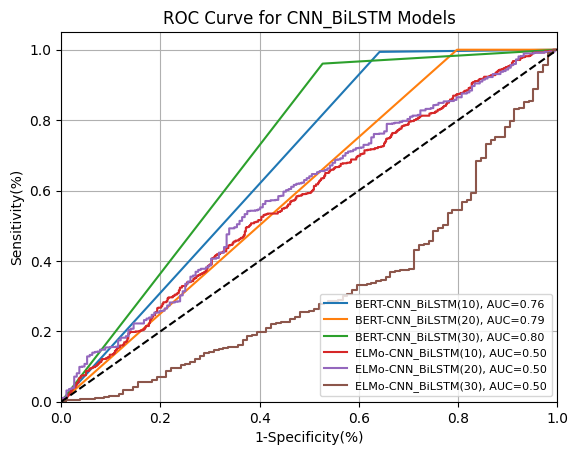

In [85]:
#create ROC curve
plt.plot(bert_cnn_bilstm10_fpr, bert_cnn_bilstm10_tpr, label='BERT-CNN_BiLSTM(10), AUC=0.76')
plt.plot(bert_cnn_bilstm20_fpr, bert_cnn_bilstm20_tpr, label='BERT-CNN_BiLSTM(20), AUC=0.79')
plt.plot(bert_cnn_bilstm30_fpr, bert_cnn_bilstm30_tpr, label='BERT-CNN_BiLSTM(30), AUC=0.80')
plt.plot(elmo_cnn_bilstm10_fpr, elmo_cnn_bilstm10_tpr, label='ELMo-CNN_BiLSTM(10), AUC=0.50')
plt.plot(elmo_cnn_bilstm20_fpr, elmo_cnn_bilstm20_tpr, label='ELMo-CNN_BiLSTM(20), AUC=0.50')
plt.plot(elmo_cnn_bilstm30_fpr, elmo_cnn_bilstm30_tpr, label='ELMo-CNN_BiLSTM(30), AUC=0.50')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC Curve for CNN_BiLSTM Models')
plt.grid()
plt.ylabel('Sensitivity(%)')
plt.xlabel('1-Specificity(%)')
plt.legend(loc='lower right', fontsize=8)
plt.show()